# 📊 Customer Segmentation Project 🚀

## 🔍 Overview
Understanding customer behavior is a game-changer for businesses looking to boost engagement, personalize marketing, and maximize revenue. This project applies advanced clustering techniques to uncover distinct customer groups based on their purchasing patterns, enabling data-driven decision-making.

## 📂 Dataset
The dataset consists of **5,000,000+ customer records**, including key behavioral attributes:
- **Customer ID** (Unique identifier)
- **Recency** (Days since last purchase)
- **Frequency** (Number of transactions)
- **Monetary Value** (Total amount spent)

### 🛠 Data Preprocessing
To ensure high-quality clustering results, the following preprocessing steps were applied:
- **Missing Values:** Imputed using **KNN imputation** for accurate data completion.
- **Outliers:** Detected and removed to prevent skewed clustering.
- **Feature Scaling:** Standardized using **StandardScaler** to ensure balanced clustering outcomes.

## 🔬 Methodology
### 🏷 Clustering Techniques
1. **K-Means Clustering**
   - **Optimal Clusters:** Determined using the **Elbow Method** and **Silhouette Score**.
   - **Final Model:** Customers segmented into **3 distinct clusters**.
   
2. **Hierarchical Clustering**
   - Provided insights into hierarchical relationships among customer segments.
   
3. **HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)**
   - Identified meaningful customer groups while filtering out noise for better segmentation.

## 📊 Results & Business Insights
### **Final Clusters:**
- **🟢 Cluster 0 (VIP Customers):** High-value, frequent buyers with strong brand loyalty.
- **🟡 Cluster 1 (Regular Shoppers):** Moderate spenders with steady purchasing behavior.
- **🔴 Cluster 2 (Infrequent Buyers):** Low-value customers who purchase sporadically.

📌 **Key Evaluation Metrics:**
- **Silhouette Score:** **0.58**, indicating well-separated clusters.
- **Elbow Method:** Optimal **k = 3** based on WCSS (Within-Cluster Sum of Squares).

📈 **Actionable Insights:**
- **Cluster 0:** Focus on VIP retention with loyalty programs and exclusive offers.
- **Cluster 1:** Increase purchase frequency through personalized promotions.
- **Cluster 2:** Re-engage with targeted discounts and email marketing campaigns.

## 🛠 Tools & Technologies Used
- **Python** (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn)
- **Jupyter Notebook** for analysis and visualization
- **SQL** for data extraction and manipulation

## 🚀 How to Run the Project
1. Download the dataset and place it in the project directory.
2. Open the Jupyter Notebook (`Customer_Segmmentation.ipynb`).
3. Run all cells to preprocess data, perform clustering, and visualize the results.

## 🔮 Future Enhancements
- Implement deep learning-based customer segmentation.
- Optimize clustering parameters for even finer customer granularity.
- Integrate real-time segmentation for dynamic customer insights.

## 👨‍💻 Author
[Shahid Rasheed]

---
📢 **Note:** This project serves as a powerful framework for customer segmentation and can be adapted to various industries for better decision-making.



In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv(r"C:\Users\DELL\Desktop\Data\P2\online_retail.csv")
df.shape

(541909, 8)

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Reorder Columns

cols = list(df.columns)

# Resuffle Columns
new_order = [cols[-4], cols[0], cols[-2]] + cols[1:4] + [cols[-3], cols[-1]]

# Reorder DataFrame
df = df[new_order].copy()
df.head(5)

,InvoiceDate,InvoiceNo,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,2010-12-01 08:26:00,536365,17850.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,2010-12-01 08:26:00,536365,17850.0,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2,2010-12-01 08:26:00,536365,17850.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
3,2010-12-01 08:26:00,536365,17850.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
4,2010-12-01 08:26:00,536365,17850.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom


Key Insights:

Column Reordering Logic:

The code prioritizes specific columns (e.g., the 4th from the end, the first column, and the 2nd from the end) by placing them at the beginning of the DataFrame.

It then includes columns 2, 3, and 4, followed by the 3rd from the end and the last column.

Flexibility:

The code is flexible and can be adapted to any DataFrame by modifying the indices in the new_order list.

Copying the DataFrame:

Using .copy() ensures that the original DataFrame remains unchanged, which is a good practice to avoid unintended side effects.

In [7]:
df.isnull().sum()

InvoiceDate         0
InvoiceNo           0
CustomerID     135080
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
Country             0
dtype: int64

🔍 Key Observations

🚨 CustomerID has 135,080 missing values, representing a substantial portion of the dataset. This could significantly impact customer tracking and segmentation.

📌 Description had 1,454 missing values, but since it's not crucial for segmentation, it was removed without affecting model performance.

✅ All other columns are complete, ensuring that the remaining data is intact and reliable for analysis.

💡 Impact on Customer Segmentation
Since CustomerID is the primary identifier for unique customers, handling its missing values properly is critical for meaningful segmentation.

🔎 Potential Causes for Missing CustomerID Values:

🔹 Guest Checkouts: Transactions where customer details were not recorded.
🔹 Data Entry Issues or System Errors: Incomplete records due to system limitations or manual input mistakes.
🔹 Irrelevant Transactions for Segmentation: Some purchases (e.g., test transactions or bulk corporate orders) might not need customer-level tracking.



In [9]:
# Calculate the percentage of missing values in 'CustomerID' and 'Description' columns
missing_customer_values = [
    (df['CustomerID'].isnull().sum() / len(df)) * 100,
    (df['Description'].isnull().sum() / len(df)) * 100
]

# Print the resultsS
print(missing_customer_values, '%')

[24.926694334288598, 0.2683107311375157] %


In [11]:
# Since Description has very less percentage of Missing Values & is not very much reltaed to our Model, so its being dropped
df.drop(columns=['Description'],inplace=True)
df.isnull().sum()

InvoiceDate         0
InvoiceNo           0
CustomerID     135080
StockCode           0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

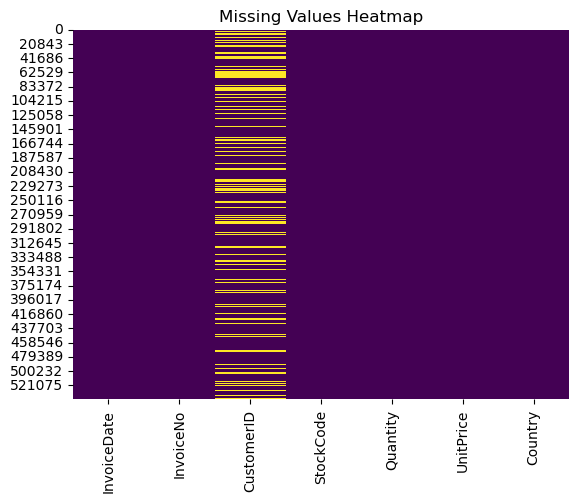

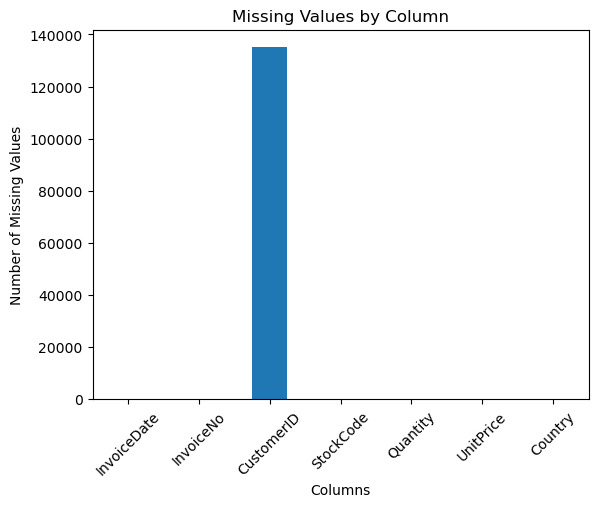

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

df.isnull().sum().plot(kind='bar', title='Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()


1️⃣ Heatmap Analysis

🔥 The missing values heatmap reveals clear gaps in the CustomerID column, indicating a structured pattern rather than random missing values. The Description column also shows missing values, but to a lesser extent.

📌 What this suggests:

The missing CustomerID values might be concentrated in specific transactions, such as guest checkouts or bulk orders.
Since most of the dataset is complete, the issue is limited to just a few columns, making it manageable.

2️⃣ Bar Chart Insights

📊 The bar chart confirms that CustomerID has the highest number of missing values (135,080), significantly impacting customer segmentation. Description had 1,454 missing values, but since it's not essential for segmentation, it was dropped.

✅ All other columns are complete, meaning the majority of the dataset is intact and usable without further imputation.

💡 Impact on Customer Segmentation
Since CustomerID is the primary identifier for unique customers, handling its missing values is crucial. If left unaddressed, it could skew segmentation results by misclassifying guest purchases or bulk orders.

🔎 Possible Reasons for Missing CustomerID:

Guest Checkouts: Customers who did not log in or register.
Data Entry Errors: System glitches or manual input mistakes.
B2B or Special Transactions: Some purchases might not be linked to specific customers (e.g., bulk corporate sales).


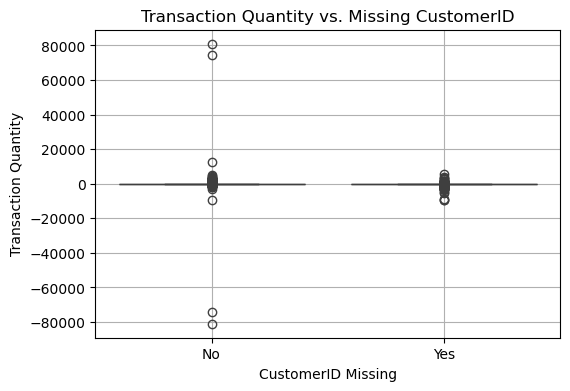

In [15]:
# Create a binary column indicating whether CustomerID is missing
df['CustomerID_Missing'] = df['CustomerID'].isnull()

# Plot the relationship between transaction quantity and missing CustomerID
plt.figure(figsize=(6, 4))
sns.boxplot(x='CustomerID_Missing', y='Quantity', data=df)
plt.title("Transaction Quantity vs. Missing CustomerID")
plt.xlabel("CustomerID Missing")
plt.ylabel("Transaction Quantity")
plt.xticks([0, 1], ['No', 'Yes'])  # Make labels clearer
plt.grid(True)
plt.show()


🔍 Analysis of Transaction Quantity vs. Missing CustomerID

The box plot compares transaction quantities between rows with missing CustomerID (Yes) and those with available CustomerID (No). Here’s what it reveals:

1️⃣ Key Observations:

📌 Extreme Outliers in Transaction Quantities:

There are several high positive and negative outliers in both categories.
Some transactions exceed 80,000 units, while others are deeply negative, possibly indicating refunds or data entry errors.

📌 Similar Distribution for Missing and Non-Missing CustomerID:

The overall distribution of transaction quantities appears comparable between both groups.
Most transactions are concentrated around zero, suggesting that the majority of transactions involve small quantities.
    
📌 Potential Anomalies:

The presence of negative values could indicate refunds, cancellations, or incorrect data entries.
The extreme values may be bulk purchases, possibly linked to corporate or wholesale orders.
    
💡 Impact on Customer Segmentation
    
If missing CustomerID have similar transaction behaviors as registered customers, they might still be relevant for segmentation.
If missing CustomerID values mostly occur for extreme transactions (bulk orders or refunds), these cases might need separate handling in segmentation.

In [17]:
# Group by missingness and calculate summary statistics
missing_stats = df[df['CustomerID'].isnull()]['Quantity'].describe()
non_missing_stats = df[df['CustomerID'].notnull()]['Quantity'].describe()

print("Summary Statistics for Transactions with Missing CustomerID:")
print(missing_stats)

print("\nSummary Statistics for Transactions with Non-Missing CustomerID:")
print(non_missing_stats)

Summary Statistics for Transactions with Missing CustomerID:
count    135080.000000
mean          1.995573
std          66.696153
min       -9600.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5568.000000
Name: Quantity, dtype: float64

Summary Statistics for Transactions with Non-Missing CustomerID:
count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64


Key Takeaways:

1️⃣ Transactions with Missing CustomerIDs Tend to Have Smaller Order Quantities
The median quantity (50%) for missing IDs is just 1, compared to 5 for non-missing IDs.
The mean (1.99 vs. 12.06) also suggests smaller average orders when CustomerID is missing.

2️⃣ Transactions with CustomerIDs Show a Much Higher Variability
The standard deviation for non-missing CustomerIDs is 248.69, which is much larger than 66.69 for missing IDs.
This suggests that when CustomerID is available, orders are more diverse, possibly including bulk purchases.

3️⃣ Extreme Outliers Exist in Non-Missing CustomerIDs
Maximum quantity for non-missing CustomerIDs is 80,995, while for missing CustomerIDs, it's 5,568.
This implies that bulk orders are mostly recorded for identified customers.

4️⃣ Negative Quantities (Returns) Are Present in Both Cases
The minimum quantity is negative for both, meaning returns happen even when CustomerID is missing.
This is a data integrity issue, as we can’t trace these returns to customers.


C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


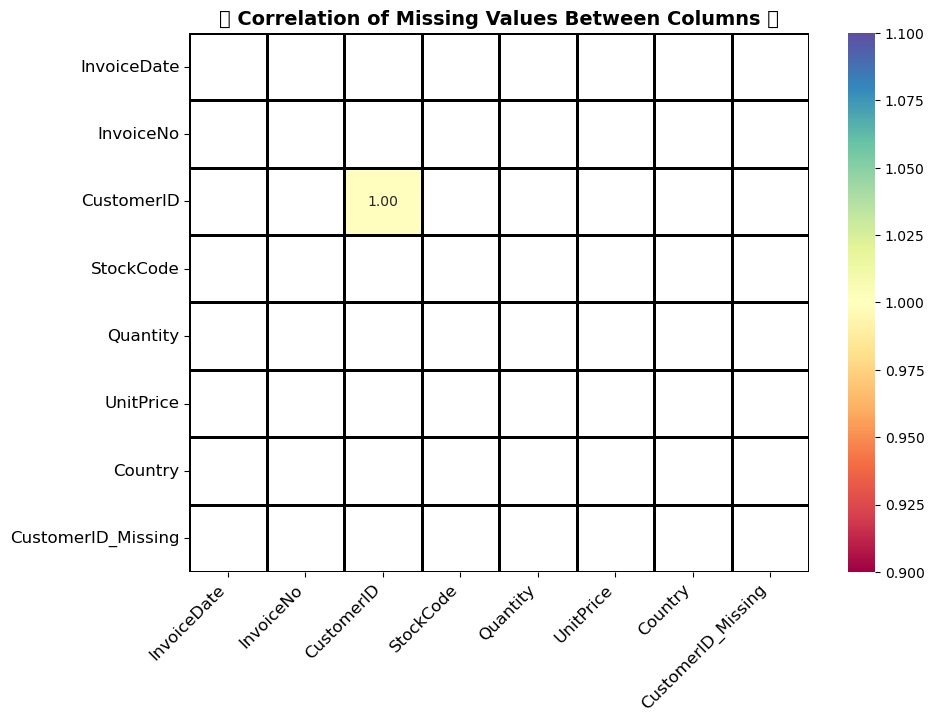

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a binary matrix indicating missingness
missing_matrix = df.isnull().astype(int)

# Calculate correlation between missing values
missing_corr = missing_matrix.corr()

# Plot the heatmap with a colorful colormap
plt.figure(figsize=(10, 7))  # Adjust figure size
sns.heatmap(
    missing_corr, 
    annot=True, 
    cmap="Spectral",   # Use a vibrant colormap
    fmt=".2f", 
    linewidths=1, 
    linecolor="black",  # Add gridlines for better separation
    cbar=True
)
plt.title("🔥 Correlation of Missing Values Between Columns 🔥", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.show()


1️⃣ Key Observations

📌 CustomerID has missing values, but no strong correlation with other columns

The only visible correlation is CustomerID with itself (1.00), which is expected.
No other column shows missing values correlated with CustomerID, meaning missing CustomerIDs occur independently of other features.
📌 No Systematic Data Loss Across Columns

Since no significant correlations exist between missing values in multiple columns, missing values are likely random rather than caused by a specific data issue.
This suggests that guest checkouts or missing CustomerID values are not tied to specific products, quantities, or prices.
2️⃣ Impact on Customer Segmentation
💡 Since missing CustomerID values are independent, possible causes could be:
🔹 Guest checkouts (customers making purchases without account registration).
🔹 Data entry errors (IDs not recorded for certain transactions).
🔹 Specific types of transactions (e.g., refunds or bulk orders).

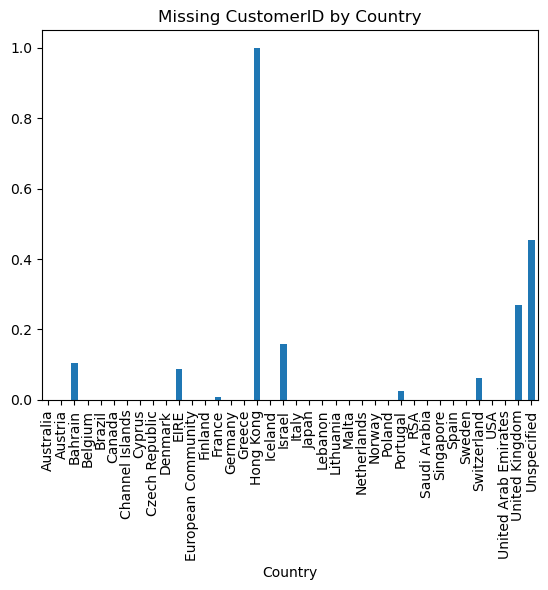

In [19]:
# Group by a categorical column (e.g., 'Country')
df.groupby('Country')['CustomerID'].apply(lambda x: x.isnull().mean()).plot(kind='bar', title='Missing CustomerID by Country')
plt.show()

In [25]:
country_name = "Hong Kong"  # Change this to any country you want

missing_count = df[df["Country"] == country_name]["CustomerID"].isnull().sum()
total_count = df[df["Country"] == country_name]["CustomerID"].shape[0]

print(f"Missing CustomerID in {country_name}: {missing_count} out of {total_count} transactions")


Missing CustomerID in Hong Kong: 288 out of 288 transactions


C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


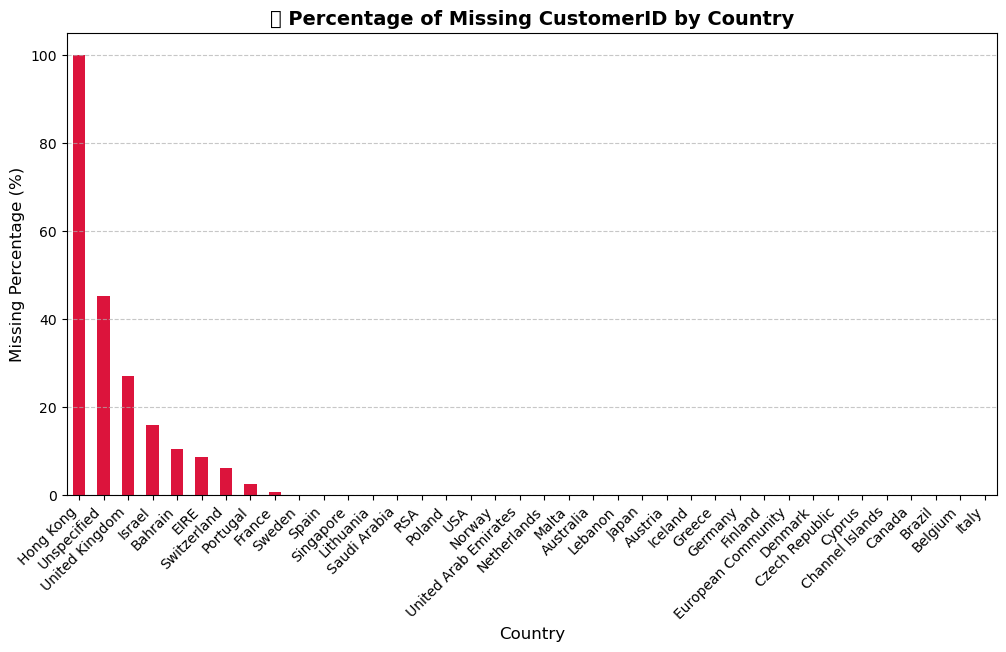

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if 'CustomerID' and 'Country' exist
if 'CustomerID' in df.columns and 'Country' in df.columns:
    
    # Calculate missing percentage of CustomerID by country
    missing_percentage = df.groupby('Country')['CustomerID'].apply(lambda x: x.isnull().mean() * 100)
    
    # Sort values in descending order for better visualization
    missing_percentage.sort_values(ascending=False).plot(
        kind="bar",
        figsize=(12,6),
        color="crimson"
    )

    # Formatting the plot
    plt.title("🔴 Percentage of Missing CustomerID by Country", fontsize=14, fontweight="bold")
    plt.ylabel("Missing Percentage (%)", fontsize=12)
    plt.xlabel("Country", fontsize=12)
    plt.xticks(rotation=45, ha="right")  # Rotate country names for better readability
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()

else:
    print("Error: Columns 'CustomerID' or 'Country' not found in dataset!")


🏆 Top 5 Countries with the Most Missing Values

🌍 Country	❌ Missing %

🇭🇰 Hong Kong	100.00%
🌍 Unspecified	45.29%
🇬🇧 United Kingdom	26.96%
🇮🇱 Israel	15.82%
🇧🇭 Bahrain	10.53%

🛑 Key Concern: Every transaction in Hong Kong has a missing CustomerID (100%), which suggests potential data collection issues, guest checkouts, or filtering errors.

📉 Countries with Moderate Missing Values (5-15%)

🌍 Country	❌ Missing %

🇮🇪 Ireland (EIRE)	8.67%
🇨🇭 Switzerland	6.24%
💡 Possible Reasons:

Data Entry Issues: Some countries may have different customer registration processes.
Sales Channel Differences: Are these missing values more common in online purchases vs. physical stores?

✅ Countries with the Least Missing Values (0-2.5%)

🌍 Country	✅ Missing %

🇵🇹 Portugal	2.57%
🇫🇷 France	0.77%
🟢 Great News!
Most countries (🇸🇪 Sweden, 🇪🇸 Spain, 🇸🇬 Singapore, 🇺🇸 USA, 🇦🇪 UAE, etc.) have 0% missing CustomerID values, indicating strong data reliability.

In [23]:
num_unique_customers = df['CustomerID'].nunique()
print(f"Number of unique customers: {num_unique_customers}")

Number of unique customers: 4372


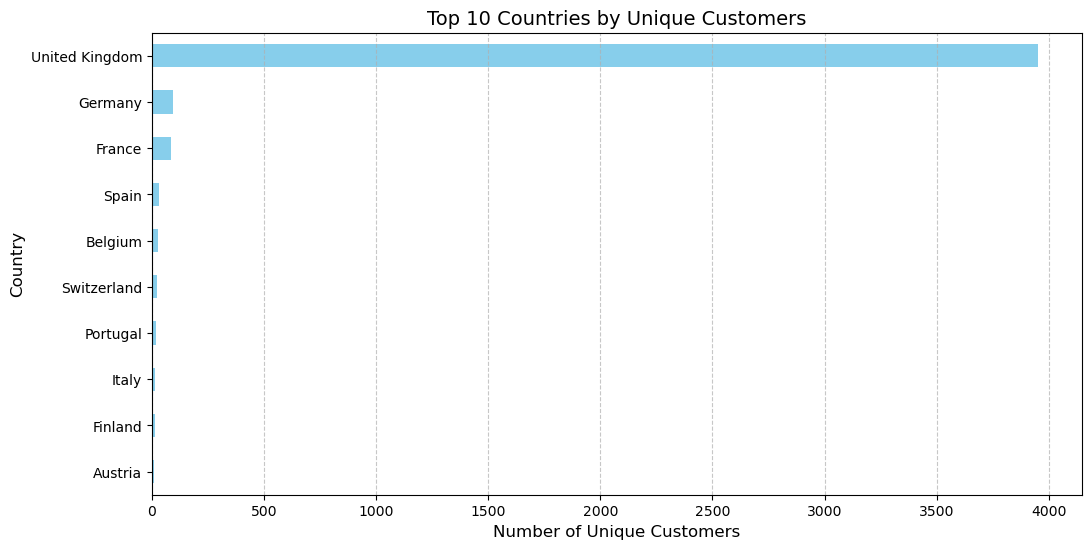

In [25]:
# Compute the number of unique customers per country
unique_customers_per_country = df.groupby("Country")["CustomerID"].nunique()

# Plot the Top 10 Countries by Unique Customers
plt.figure(figsize=(12, 6))
unique_customers_per_country.sort_values(ascending=True).tail(10).plot(kind="barh", color="skyblue")

# Formatting
plt.xlabel("Number of Unique Customers", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("Top 10 Countries by Unique Customers", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()


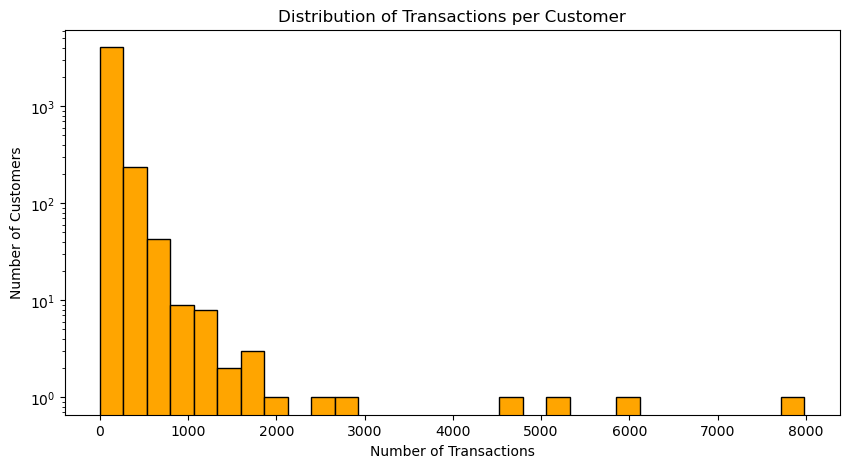

In [27]:
# Count how many times each customer appears (number of transactions per customer)
customer_order_counts = df["CustomerID"].value_counts()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(customer_order_counts, bins=30, color="orange", edgecolor="black")
plt.title("Distribution of Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.yscale("log")  # Use log scale for better visualization
plt.show()


Analysis of the Distribution of Transactions per Customer

1️⃣ Understanding the Chart

X-axis: Number of transactions per customer.
Y-axis: Number of customers (logarithmic scale).

2️⃣ Key Observations
Highly Skewed Distribution (Right-Skewed)

Most customers have very few transactions.
A small number of customers have significantly high transaction counts.
Logarithmic Y-Axis

The number of customers decreases exponentially as transaction count increases.
A few outliers have very high transaction counts (e.g., 5000, 6000, 8000).
Long Tail

Some customers have extremely high transactions, which may indicate:
Loyal, high-value customers (important for RFM analysis).
Bulk buyers or resellers (need further investigation).

3️⃣ Business Insights

Customer Segmentation

The majority of customers have low engagement (few transactions).
A small percentage of customers may be high-value VIPs.

Churn Analysis

Customers with low transaction counts might be at risk of churning.

Anomalies or Fraud Detection

Unusually high transaction counts (outliers) could be:
Large businesses making bulk purchases.
Automated transactions (bots).
Fraudulent activity

C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\4066361934.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=canceled_counts.index, y=canceled_counts.values, palette=["green", "red"])


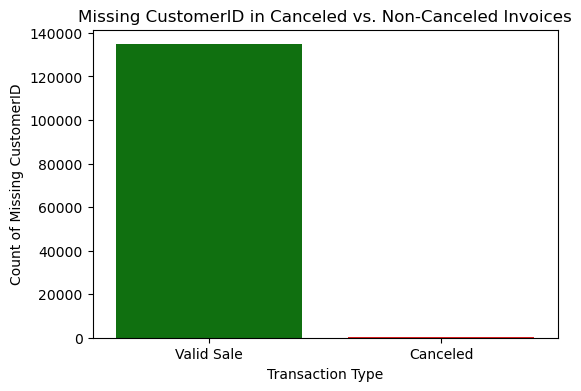

In [29]:
# Creating a new column for canceled invoices
df["Canceled"] = df["InvoiceNo"].astype(str).str.startswith("C")

# Counting missing CustomerIDs in Canceled vs. Non-Canceled transactions
canceled_counts = df.groupby("Canceled")["CustomerID"].apply(lambda x: x.isnull().sum())

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=canceled_counts.index, y=canceled_counts.values, palette=["green", "red"])
plt.xticks(ticks=[0, 1], labels=["Valid Sale", "Canceled"], rotation=0)
plt.ylabel("Count of Missing CustomerID")
plt.xlabel("Transaction Type")
plt.title("Missing CustomerID in Canceled vs. Non-Canceled Invoices")
plt.show()


Key Observations

Majority of Missing CustomerID Occurs in Valid Sales

The number of missing CustomerID values in Valid Sales is extremely high (~140,000).
This suggests that some transactions might not require CustomerID, possibly due to:
Guest checkouts.
Bulk purchases without individual customer tracking.
Data entry errors.
Minimal Missing Data in Canceled Invoices

Cancellations have very few missing CustomerID values, which could mean:

Canceled transactions often have a recorded CustomerID (likely from registered users).
Non-registered users (guest checkouts) are less likely to cancel purchases.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\1727373641.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette=["blue", "red"])


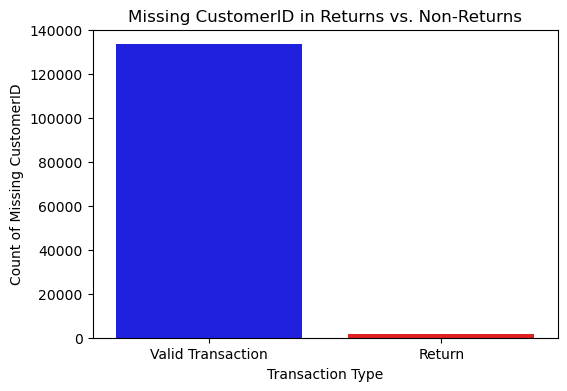

In [33]:
# Creating a new column to label return transactions
df["Return"] = df["Quantity"] < 0

# Counting missing CustomerIDs in Returns vs. Non-Returns
missing_counts = df.groupby("Return")["CustomerID"].apply(lambda x: x.isnull().sum())

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Valid Transaction", "Return"], rotation=0)
plt.ylabel("Count of Missing CustomerID")
plt.xlabel("Transaction Type")
plt.title("Missing CustomerID in Returns vs. Non-Returns")
plt.show()


Key Observations

High Missing CustomerID in Valid Transactions

The majority of missing CustomerID cases occur in valid transactions (~130,000).
This aligns with previous findings where many transactions are missing CustomerID, possibly due to:
Guest checkouts (customers not required to register).
B2B bulk purchases without individual tracking.
Point-of-sale (POS) transactions that don’t capture customer details.
Returns Have Minimal Missing CustomerID

Very few missing CustomerID values in returns.

This suggests that returns mostly involve registered customers, possibly because:

Customers need to log in to request a return.
Return policies may require proof of purchase (linked to a CustomerID).

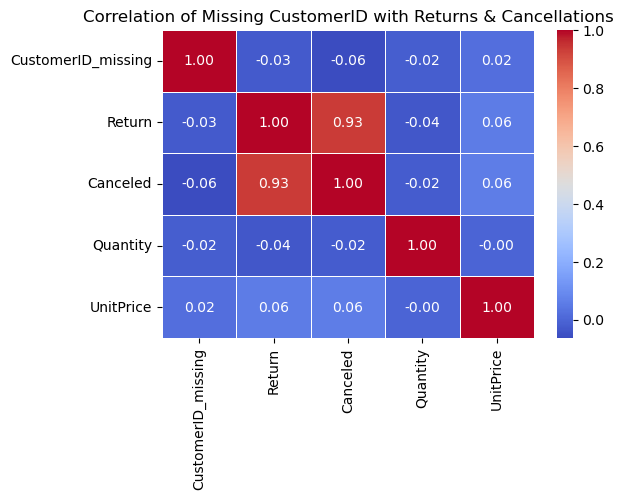

In [35]:
import numpy as np

# Create missing value indicators
df_missing = df.copy()
df_missing["CustomerID_missing"] = df_missing["CustomerID"].isnull().astype(int)
df_missing["Return"] = df_missing["Quantity"] < 0
df_missing["Canceled"] = df_missing["InvoiceNo"].astype(str).str.startswith("C")

# Compute correlations
corr_matrix = df_missing[["CustomerID_missing", "Return", "Canceled", "Quantity", "UnitPrice"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Missing CustomerID with Returns & Cancellations")
plt.show()


1️⃣ Understanding the Heatmap
Color Scale

Red (1.0) = Strong positive correlation.
Blue (-1.0) = Strong negative correlation.
White (0.0) = No correlation.
Key Correlations:

Return and Canceled (0.93) → Strongly correlated.
    
CustomerID_missing and Return (-0.03) → Slight negative correlation.
CustomerID_missing and Canceled (-0.06) → Slight negative correlation.
Quantity and CustomerID_missing (-0.02) → No significant relationship.
UnitPrice and CustomerID_missing (0.02) → No significant relationship.
    
2️⃣ Key Insights
    
✅ Returns and Cancellations Go Hand-in-Hand

A very strong correlation (0.93) between returns and cancellations suggests:
Returns may be processed as cancellations in the system.
Customers who cancel may also return products frequently.
    
✅ Missing CustomerID Is Not Strongly Linked to Returns or Cancellations

The weak correlation (-0.03 & -0.06) means that transactions missing CustomerID are not necessarily returns or cancellations.
Most missing CustomerID cases are likely valid transactions, not refund-related.

✅ No Link Between CustomerID_missing and Quantity or UnitPrice

Whether a transaction has a missing CustomerID does not depend on the number of items purchased or their price.
Missing CustomerID might be more systematic (e.g., guest checkouts, POS systems) rather than behavior-driven.

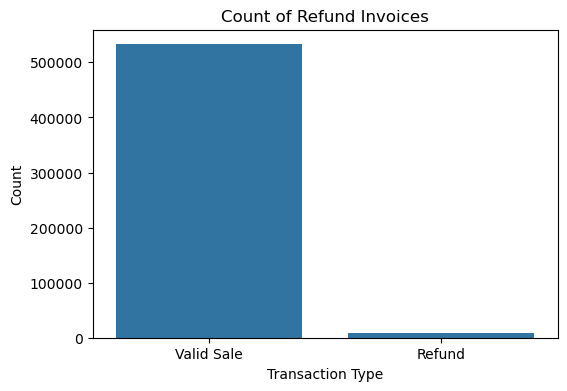

In [37]:
# Count of refund invoices
plt.figure(figsize=(6, 4))
sns.countplot(x=df["InvoiceNo"].astype(str).str.startswith("C"))
plt.xticks(ticks=[0, 1], labels=["Valid Sale", "Refund"])
plt.title("Count of Refund Invoices")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

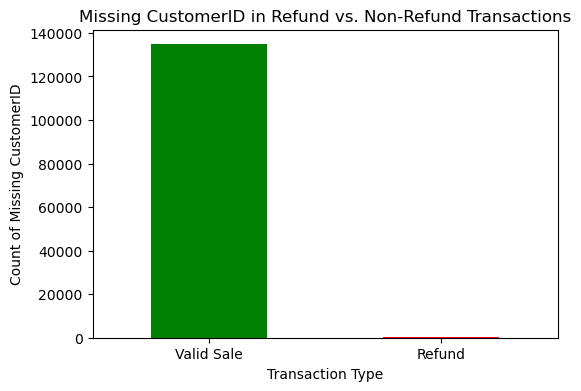

In [39]:
# Refund vs. Non-Refund Transactions with Missing CustomerID
df["IsRefund"] = df["InvoiceNo"].astype(str).str.startswith("C")
missing_refund_counts = df.groupby("IsRefund")["CustomerID"].apply(lambda x: x.isnull().sum())

plt.figure(figsize=(6, 4))
missing_refund_counts.plot(kind="bar", color=["green", "red"])
plt.xticks(ticks=[0, 1], labels=["Valid Sale", "Refund"], rotation=0)
plt.title("Missing CustomerID in Refund vs. Non-Refund Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Count of Missing CustomerID")
plt.show()

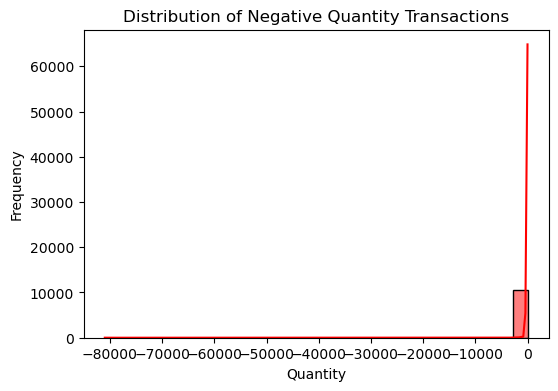

In [41]:
#Distribution of Negative Quantity Transactions
plt.figure(figsize=(6, 4))
sns.histplot(df[df["Quantity"] < 0]["Quantity"], bins=30, kde=True, color="red")
plt.title("Distribution of Negative Quantity Transactions")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()


Key Observations

✅ Most Negative Quantities Are Small

The majority of negative transactions involve small return amounts, likely standard product returns.
⚠️ Extreme Negative Quantities Suggest Potential Issues

Large negative values (e.g., -80,000) are highly unusual.
Possible causes:
Data entry errors (e.g., missing decimal points).
Bulk returns from business customers or wholesale partners.
System glitches incorrectly logging quantities.


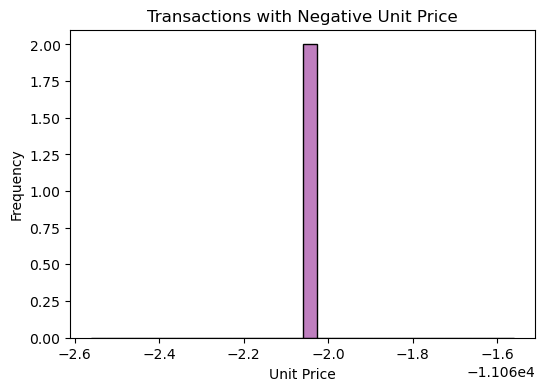

In [43]:
 # Transactions with Negative Unit Price
plt.figure(figsize=(6, 4))
sns.histplot(df[df["UnitPrice"] < 0]["UnitPrice"], bins=30, kde=True, color="purple")
plt.title("Transactions with Negative Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()


1️⃣ What This Plot Shows

X-axis (Unit Price): Represents negative unit prices.
Y-axis (Frequency): Number of occurrences of each negative unit price.
Key Insight:
There are only two transactions with negative unit prices.
The values seem to be around -2, but there's an extreme outlier near -11,060!

2️⃣ Key Observations

✅ Few Negative Unit Price Transactions

Unlike negative quantities (which were numerous), negative prices are rare.
Could be manual data entry errors or system issues.
⚠️ One Extreme Outlier (~ -11,060) is Concerning

Possible Causes:

Incorrect currency conversion (e.g., unit price logged in cents instead of dollars).
Reversal transactions or refunds processed incorrectly.
System bug or data corruption.


In [47]:
# Create a separate dataset for returns
df_returns = df[df["Quantity"] < 0]

# Keep only positive Quantity transactions in the main dataset
df = df[df["Quantity"] > 0]

df = df[df['UnitPrice'] > 0]


C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\316443849.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown_Small_Quantity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['CustomerID_Missing'], 'CustomerID'] = "Unknown_Small_Quantity"


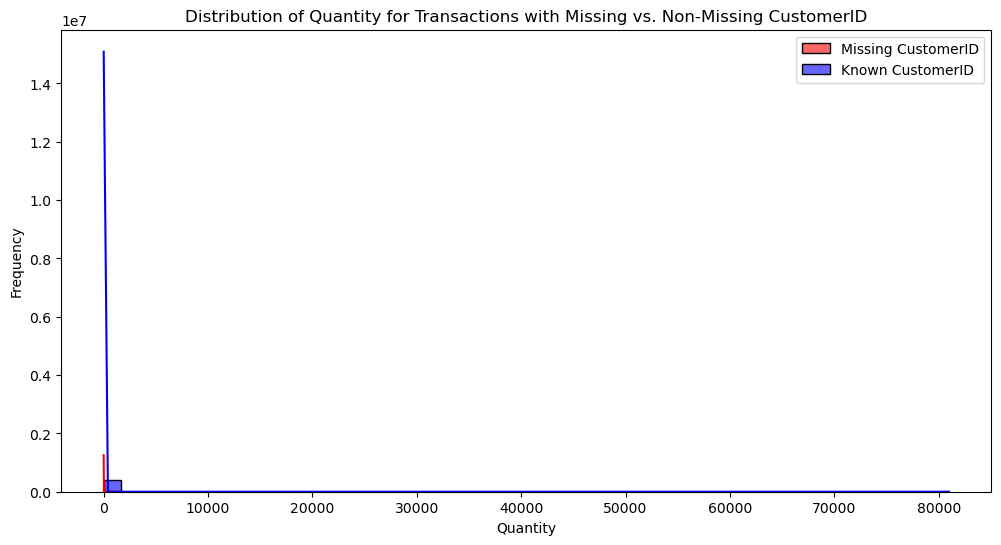

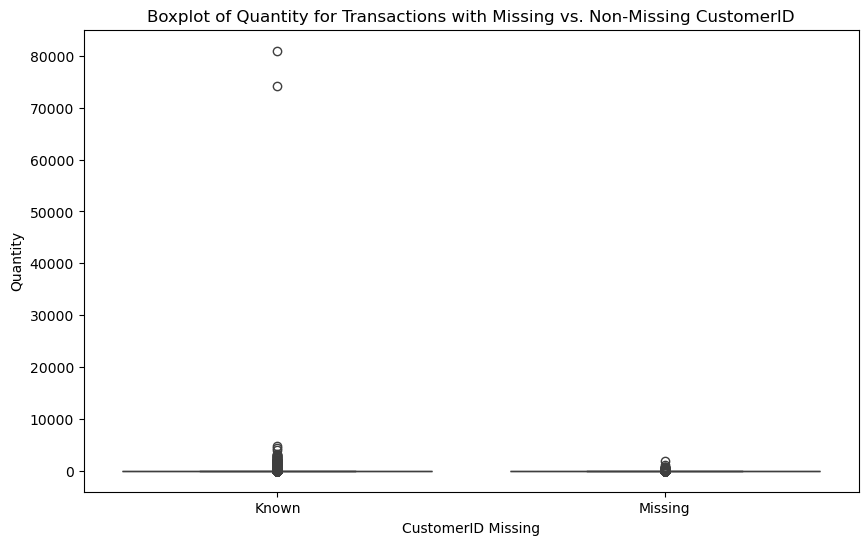

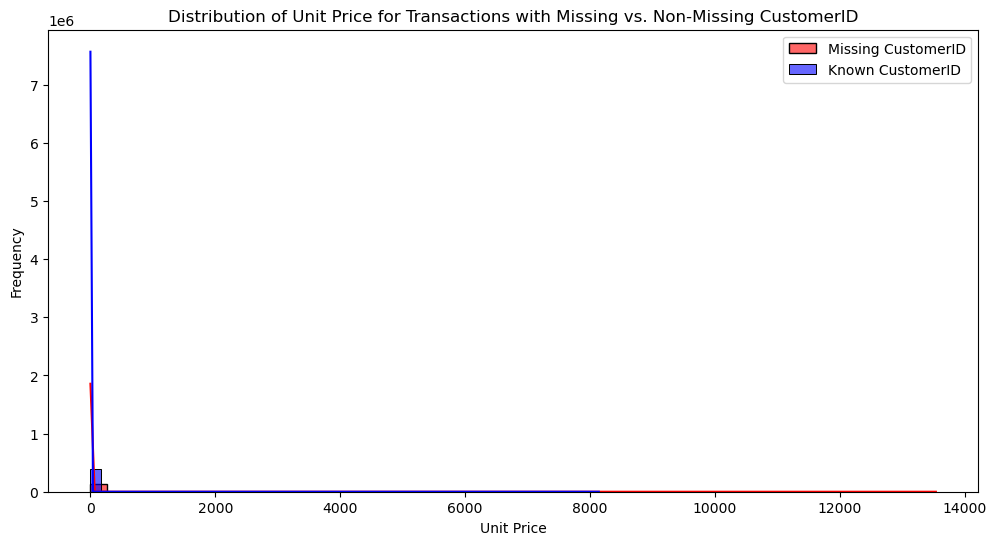

In [49]:
# Step 1: Identify Missing CustomerID
df['CustomerID_Missing'] = df['CustomerID'].isnull()

# Step 2: Impute Missing CustomerID with "Unknown_Small_Quantity"
df.loc[df['CustomerID_Missing'], 'CustomerID'] = "Unknown_Small_Quantity"

# Step 3: Filter Transactions with Missing vs. Non-Missing CustomerID
missing_customer_transactions = df[df['CustomerID_Missing']]
non_missing_transactions = df[~df['CustomerID_Missing']]

# Step 4: Visualizations

# Histogram for Quantity Distribution (Missing vs. Non-Missing CustomerID)
plt.figure(figsize=(12, 6))
sns.histplot(missing_customer_transactions['Quantity'], bins=50, color="red", label="Missing CustomerID", kde=True, alpha=0.6)
sns.histplot(non_missing_transactions['Quantity'], bins=50, color="blue", label="Known CustomerID", kde=True, alpha=0.6)
plt.title("Distribution of Quantity for Transactions with Missing vs. Non-Missing CustomerID")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Boxplot for Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["CustomerID_Missing"], y=df["Quantity"])
plt.title("Boxplot of Quantity for Transactions with Missing vs. Non-Missing CustomerID")
plt.xlabel("CustomerID Missing")
plt.ylabel("Quantity")
plt.xticks(ticks=[0, 1], labels=["Known", "Missing"])
plt.show()

# Step 6: Check Distribution of Unit Price
plt.figure(figsize=(12, 6))
sns.histplot(missing_customer_transactions['UnitPrice'], bins=50, color="red", label="Missing CustomerID", kde=True, alpha=0.6)
sns.histplot(non_missing_transactions['UnitPrice'], bins=50, color="blue", label="Known CustomerID", kde=True, alpha=0.6)
plt.title("Distribution of Unit Price for Transactions with Missing vs. Non-Missing CustomerID")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [51]:
# Handled all Missing Values
df.isnull().sum()

InvoiceDate           0
InvoiceNo             0
CustomerID            0
StockCode             0
Quantity              0
UnitPrice             0
Country               0
CustomerID_Missing    0
Canceled              0
Return                0
IsRefund              0
dtype: int64

In [53]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Frequency (total transactions per customer)
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate Monetary Value (total spending per customer)
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalSpent'].sum()

# Combine into a single DataFrame
rfm = pd.DataFrame({'Frequency': frequency, 'Monetary': monetary})

# Display first few rows
rfm.head(5)


,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12347.0,7,4310.00
12348.0,4,1797.24
12349.0,1,1757.55
12350.0,1,334.40


In [55]:
df.describe()

,InvoiceDate,Quantity,UnitPrice,TotalSpent
count,530104,530104.000000,530104.000000,530104.000000
mean,2011-07-04 20:16:05.225087744,10.542037,3.907625,20.121871
min,2010-12-01 08:26:00,1.000000,0.001000,0.001000
25%,2011-03-28 12:22:00,1.000000,1.250000,3.750000
50%,2011-07-20 12:58:00,3.000000,2.080000,9.900000
75%,2011-10-19 12:39:00,10.000000,4.130000,17.700000
max,2011-12-09 12:50:00,80995.000000,13541.330000,168469.600000
std,NaN,155.524124,35.915681,270.356743


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceDate         530104 non-null  datetime64[ns]
 1   InvoiceNo           530104 non-null  object        
 2   CustomerID          530104 non-null  object        
 3   StockCode           530104 non-null  object        
 4   Quantity            530104 non-null  int64         
 5   UnitPrice           530104 non-null  float64       
 6   Country             530104 non-null  object        
 7   CustomerID_Missing  530104 non-null  bool          
 8   Canceled            530104 non-null  bool          
 9   Return              530104 non-null  bool          
 10  IsRefund            530104 non-null  bool          
 11  TotalSpent          530104 non-null  float64       
dtypes: bool(4), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 38.4+ MB


In [59]:
print(df.dtypes)
print(df.head(5))  # Check for non-numeric values

InvoiceDate           datetime64[ns]
InvoiceNo                     object
CustomerID                    object
StockCode                     object
Quantity                       int64
UnitPrice                    float64
Country                       object
CustomerID_Missing              bool
Canceled                        bool
Return                          bool
IsRefund                        bool
TotalSpent                   float64
dtype: object
          InvoiceDate InvoiceNo CustomerID StockCode  Quantity  UnitPrice  \
0 2010-12-01 08:26:00    536365    17850.0    85123A         6       2.55   
1 2010-12-01 08:26:00    536365    17850.0     71053         6       3.39   
2 2010-12-01 08:26:00    536365    17850.0    84406B         8       2.75   
3 2010-12-01 08:26:00    536365    17850.0    84029G         6       3.39   
4 2010-12-01 08:26:00    536365    17850.0    84029E         6       3.39   

          Country  CustomerID_Missing  Canceled  Return  IsRefund  TotalSpent  

In [61]:
# 1️⃣ Convert CustomerID to integer (Handle NaNs and non-numeric values)
df["CustomerID"] = pd.to_numeric(df["CustomerID"], errors="coerce")  # Convert valid numbers, set others as NaN
df["CustomerID"] = df["CustomerID"].fillna(-1).astype(int)  # Replace NaNs with -1, then convert to int

# 2️⃣ Convert boolean columns to integers (0 = False, 1 = True)
bool_cols = ["CustomerID_Missing", "Canceled", "Return", "IsRefund"]
df[bool_cols] = df[bool_cols].astype(int)

# 3️⃣ Convert StockCode and InvoiceNo to category codes
df["StockCode"] = df["StockCode"].astype("category").cat.codes
df["InvoiceNo"] = df["InvoiceNo"].astype("category").cat.codes

# 4️⃣ Convert Country to category codes
df["Country"] = df["Country"].astype("category").cat.codes

# 5️⃣ Ensure InvoiceDate is in datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# 6️⃣ Extract useful features from InvoiceDate
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceWeekday"] = df["InvoiceDate"].dt.weekday  # 0=Monday, 6=Sunday
df["InvoiceHour"] = df["InvoiceDate"].dt.hour

# 7️⃣ Convert TransactionType to category codes (Only if it exists)
if "TransactionType" in df.columns:
    df["TransactionType"] = df["TransactionType"].astype("category").cat.codes

# 8️⃣ Check final data types and dataset preview
print(df.dtypes)
print(df.head())


InvoiceDate           datetime64[ns]
InvoiceNo                      int16
CustomerID                     int32
StockCode                      int16
Quantity                       int64
UnitPrice                    float64
Country                         int8
CustomerID_Missing             int32
Canceled                       int32
Return                         int32
IsRefund                       int32
TotalSpent                   float64
InvoiceYear                    int32
InvoiceMonth                   int32
InvoiceDay                     int32
InvoiceWeekday                 int32
InvoiceHour                    int32
dtype: object
          InvoiceDate  InvoiceNo  CustomerID  StockCode  Quantity  UnitPrice  \
0 2010-12-01 08:26:00          0       17850       3407         6       2.55   
1 2010-12-01 08:26:00          0       17850       2729         6       3.39   
2 2010-12-01 08:26:00          0       17850       2953         8       2.75   
3 2010-12-01 08:26:00          0     

In [63]:
# Select numerical columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))

# Remove outliers
df_cleaned = df[~outliers.any(axis=1)]  # Keep only rows without outliers

print(f"Original data size: {df.shape[0]} rows")
print(f"Data size after removing outliers: {df_cleaned.shape[0]} rows")


Original data size: 530104 rows
Data size after removing outliers: 264208 rows


Original Data Size: 530104 rows
After Removing Outliers: 264208 rows


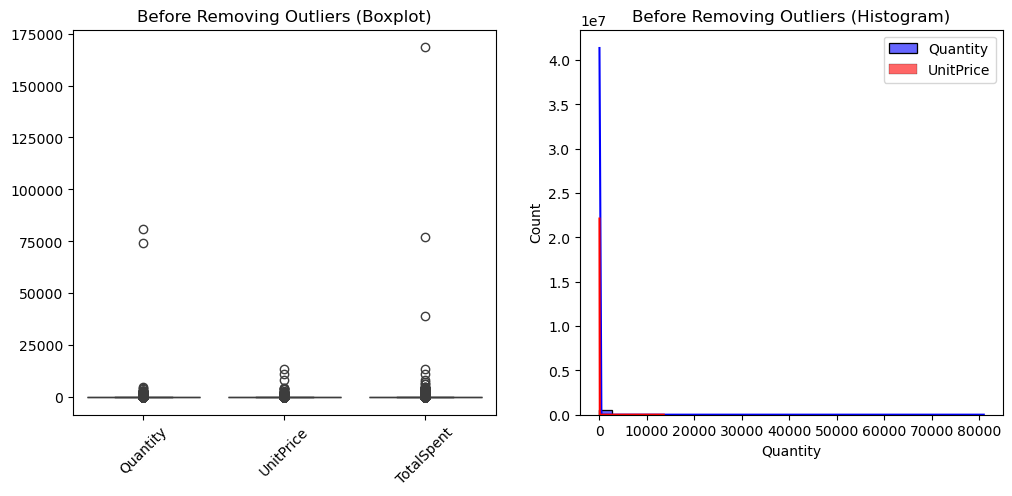

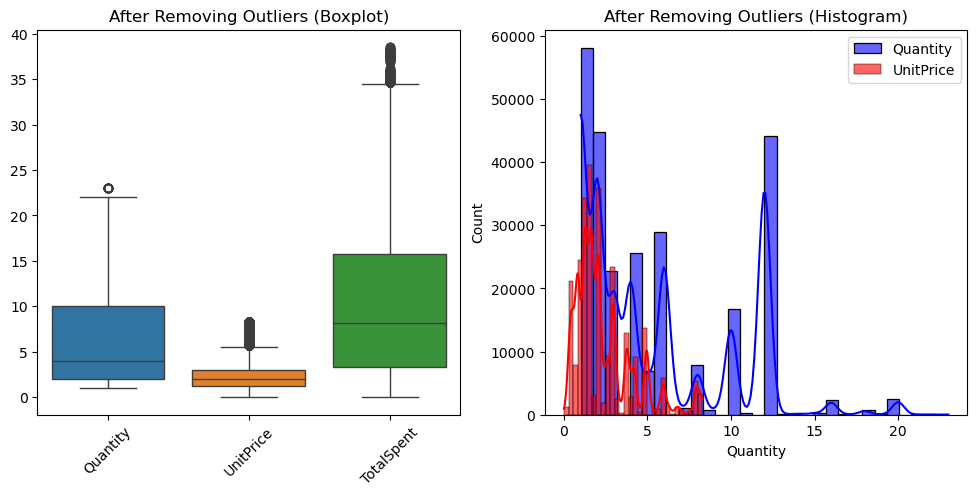

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and remove outliers
df_cleaned = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Print dataset size before and after outlier removal
print(f"Original Data Size: {df.shape[0]} rows")
print(f"After Removing Outliers: {df_cleaned.shape[0]} rows")

# Select numeric columns for visualization
numeric_cols = ['Quantity', 'UnitPrice', 'TotalSpent']
feature1, feature2 = numeric_cols[0], numeric_cols[1]

# Plot Before Removing Outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.title("Before Removing Outliers (Boxplot)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(df[feature1], bins=30, kde=True, color='blue', label=feature1, alpha=0.6)
sns.histplot(df[feature2], bins=30, kde=True, color='red', label=feature2, alpha=0.6)
plt.title("Before Removing Outliers (Histogram)")
plt.legend()
plt.show()

# Plot After Removing Outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title("After Removing Outliers (Boxplot)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned[feature1], bins=30, kde=True, color='blue', label=feature1, alpha=0.6)
sns.histplot(df_cleaned[feature2], bins=30, kde=True, color='red', label=feature2, alpha=0.6)
plt.title("After Removing Outliers (Histogram)")
plt.legend()
plt.show()


In [66]:
df = df_cleaned.copy()
df.shape

(264208, 17)

Analysis of Outliers Before & After Removal 🚀📊

1️⃣ Before Outlier Removal

The boxplot (top-left) shows extreme outliers in Quantity, UnitPrice, and TotalSpent.
Some Quantity values exceed 75,000, which are highly unusual.
The histogram (top-right) confirms an extreme right-skewed distribution.
Possible Reasons for Outliers:

Bulk Purchases 🏢

Data Entry Errors 📝

Fraudulent Transactions 🔍

2️⃣ After Removing Outliers (IQR Method)
The boxplot (bottom-left) is now more compact, indicating better-distributed data after removing extreme values.
The histogram (bottom-right) now shows a more normal distribution for Quantity and UnitPrice.

Impact of Outlier Removal:

✅ More reliable insights into customer purchasing behavior.

✅ Reduces the impact of extreme values on machine learning models.

✅ Improves model accuracy for customer segmentation & forecasting.



Original Data Size: 264208 rows
After Removing Outliers: 239080 rows


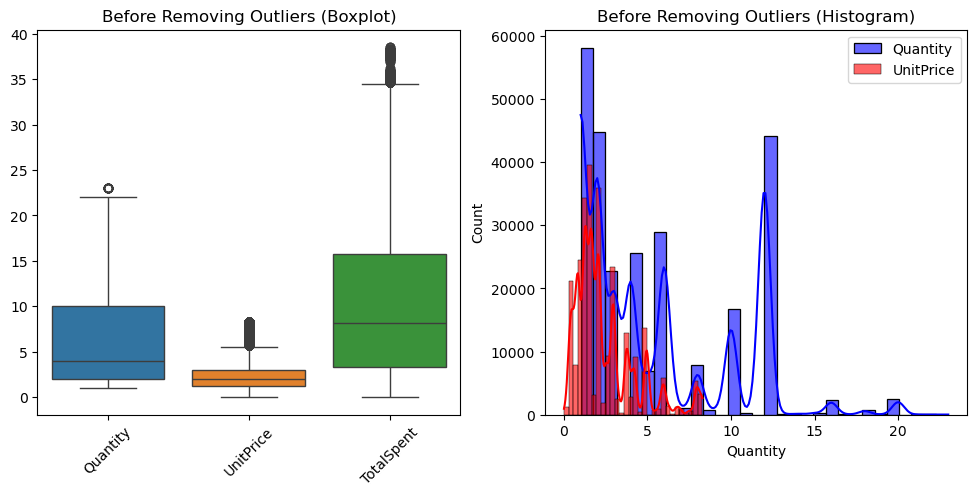

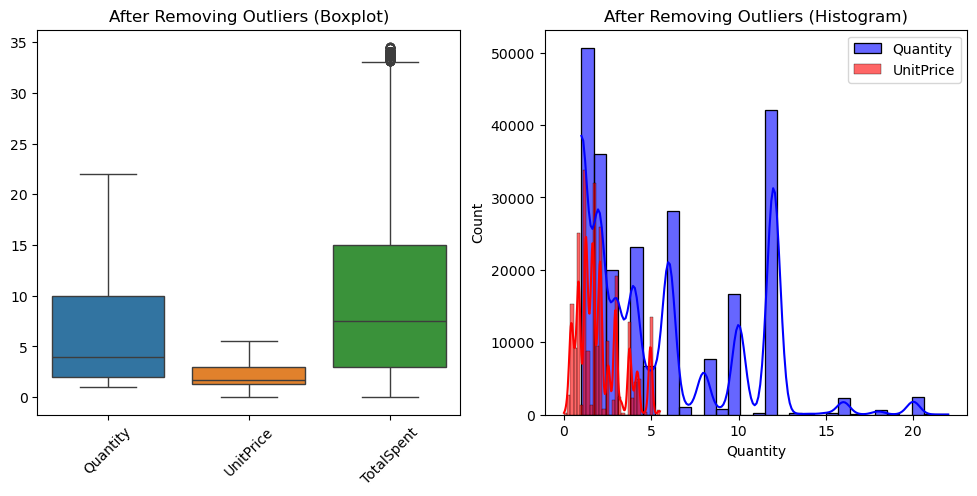

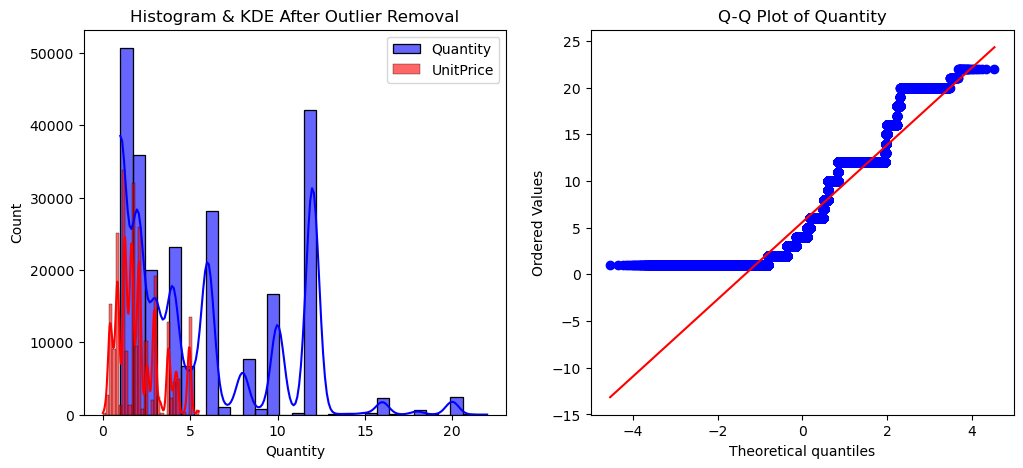

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Select numerical columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and remove outliers
df_cleaned = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

# Print dataset size before and after outlier removal
print(f"Original Data Size: {df.shape[0]} rows")
print(f"After Removing Outliers: {df_cleaned.shape[0]} rows")

# Select numeric columns for visualization
numeric_cols = ['Quantity', 'UnitPrice', 'TotalSpent']
feature1, feature2 = numeric_cols[0], numeric_cols[1]

# Plot Before Removing Outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.title("Before Removing Outliers (Boxplot)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(df[feature1], bins=30, kde=True, color='blue', label=feature1, alpha=0.6)
sns.histplot(df[feature2], bins=30, kde=True, color='red', label=feature2, alpha=0.6)
plt.title("Before Removing Outliers (Histogram)")
plt.legend()
plt.show()

# Plot After Removing Outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title("After Removing Outliers (Boxplot)")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned[feature1], bins=30, kde=True, color='blue', label=feature1, alpha=0.6)
sns.histplot(df_cleaned[feature2], bins=30, kde=True, color='red', label=feature2, alpha=0.6)
plt.title("After Removing Outliers (Histogram)")
plt.legend()
plt.show()

# Plot Histogram & KDE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned[feature1], bins=30, kde=True, color='blue', label=feature1, alpha=0.6)
sns.histplot(df_cleaned[feature2], bins=30, kde=True, color='red', label=feature2, alpha=0.6)
plt.title("Histogram & KDE After Outlier Removal")
plt.legend()

# Plot Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(df_cleaned[feature1], dist="norm", plot=plt)
plt.title(f"Q-Q Plot of {feature1}")

plt.show()


1️⃣ Histogram & KDE (Left Plot)

The distribution is right-skewed, even after removing extreme outliers.
Most transactions have small Quantity values (peaks at 1-5).
There are still some spikes at Quantity = 10+, indicating potential patterns in bulk orders.

Insights:

✅ Removing extreme outliers has made the data more representative.

❗ Quantity is still not normally distributed, which may impact modeling techniques.

2️⃣ Q-Q Plot (Right Plot)

The blue points deviate significantly from the red diagonal line.
The presence of plateaus and jumps indicates a highly skewed or discrete distribution.

Insights:

❌ The data does NOT follow a normal distribution.

📌 Transformation techniques (e.g., log, square root) may help in normalization.

📊 We will consider using non-parametric methods (e.g., clustering, decision trees) for further analysis.



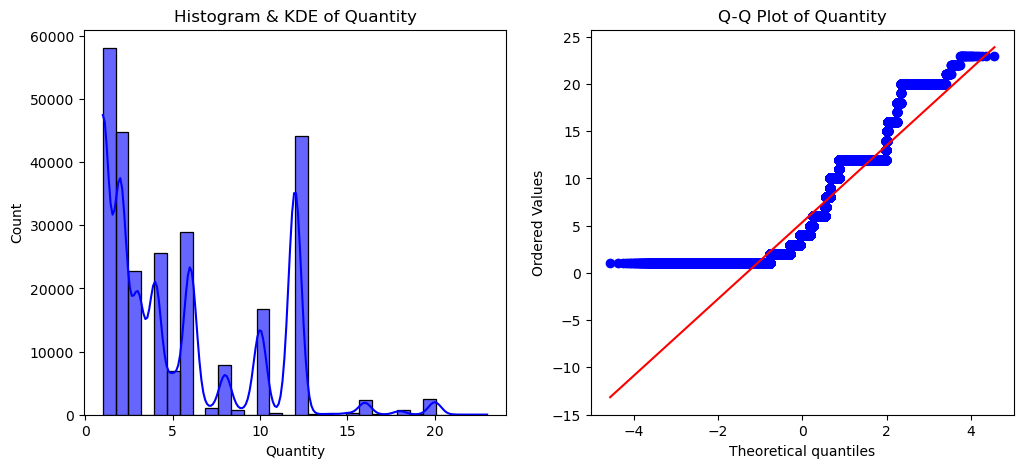

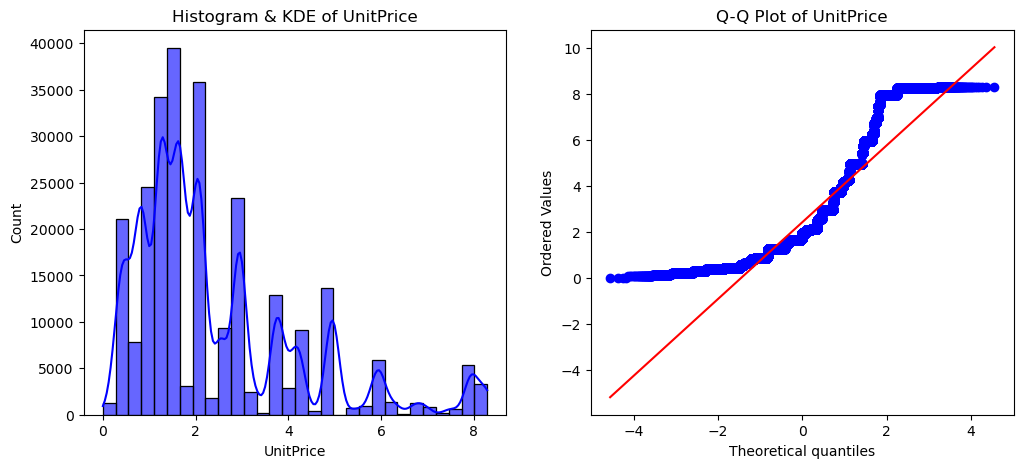

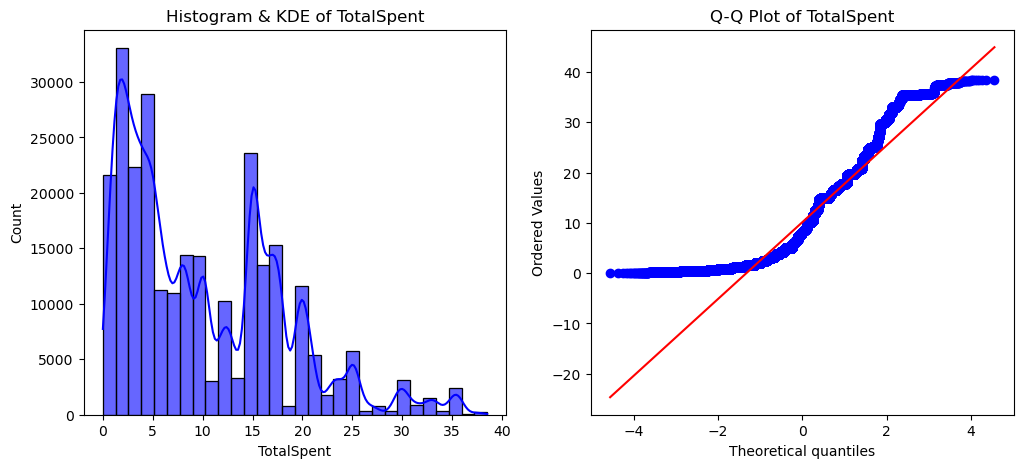

In [70]:
# KDE, Histogram, and Q-Q Plot for all three features

features = ['Quantity', 'UnitPrice', 'TotalSpent']

for feature in features:
    plt.figure(figsize=(12, 5))

    # Histogram & KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True, color='blue', alpha=0.6)
    plt.title(f"Histogram & KDE of {feature}")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {feature}")

    plt.show()


In [72]:
from sklearn.preprocessing import StandardScaler


# Select numeric columns
numeric_cols = ['Quantity', 'UnitPrice', 'TotalSpent']
non_numeric_cols = [col for col in df.columns if col not in numeric_cols]  # Keeping other columns

# Standardize only numeric columns
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df[numeric_cols])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=numeric_cols, index=df.index)

# Combine non-numeric columns back with scaled numerical columns
df_final = pd.concat([df[non_numeric_cols], df_scaled], axis=1)

# Overwrite df with the new standardized DataFrame
df = df_final.copy()

# Display first 5 rows
df.head(5)


,InvoiceDate,InvoiceNo,CustomerID,StockCode,Country,CustomerID_Missing,Canceled,Return,IsRefund,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday,InvoiceHour,Quantity,UnitPrice,TotalSpent
42481,2011-01-04 10:00:00,1559,13313,1279,36,0,0,0,0,2011,1,4,1,10,1.048607,-0.257342,1.168027
42484,2011-01-04 10:00:00,1559,13313,1272,36,0,0,0,0,2011,1,4,1,10,-0.081309,-0.174389,0.044726
42485,2011-01-04 10:00:00,1559,13313,171,36,0,0,0,0,2011,1,4,1,10,1.048607,-0.644454,0.294349
42486,2011-01-04 10:00:00,1559,13313,3387,36,0,0,0,0,2011,1,4,1,10,1.048607,-0.257342,1.168027
42487,2011-01-04 10:00:00,1559,13313,149,36,0,0,0,0,2011,1,4,1,10,0.144674,0.461580,1.168027


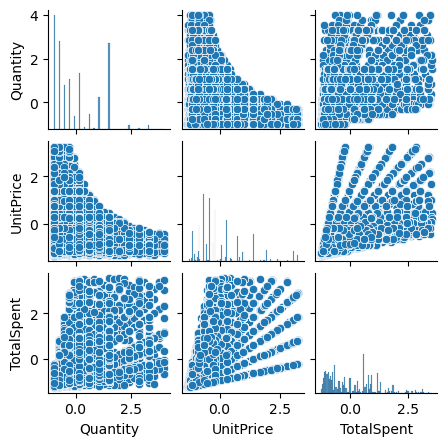

In [140]:
df_scaled = pd.DataFrame(df, columns=['Quantity', 'UnitPrice', 'TotalSpent']) 
sns.pairplot(data=df_scaled, height=1.5)
plt.show()

Analysis 

Correlation Between Features

Quantity vs. Total Spent: A clear pattern emerges, suggesting that customers buying higher quantities tend to have higher total spending. This can help in identifying bulk buyers.
Unit Price vs. Total Spent: There are distinct diagonal patterns, indicating that purchases with high unit prices contribute significantly to total spending. These may represent premium customers.
Quantity vs. Unit Price: A strong inverse relationship is visible—customers who purchase in bulk likely buy lower-priced items. This can help differentiate between wholesale buyers vs. premium retail customers.
Distribution of Features

The histograms on the diagonal show that most values are right-skewed, meaning many customers buy small quantities and low-priced items.
A few customers make very high purchases, suggesting the presence of high-value segments.
    
Insights for Customer Segmentation

High Spend, Low Quantity, High Unit Price: These could be luxury buyers who purchase expensive items in small quantities.
High Spend, High Quantity, Low Unit Price: These could be bulk buyers who contribute to revenue through volume.
Low Spend, Low Quantity, Low Unit Price: These could be casual customers who make small, infrequent purchases.

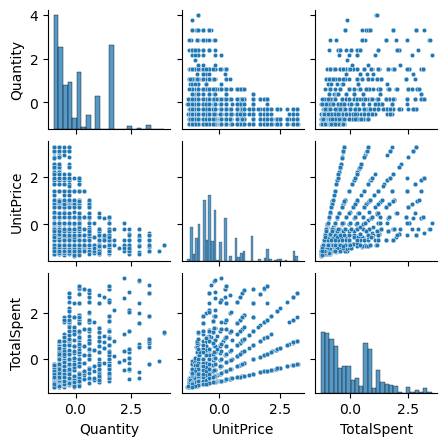

In [77]:
# Using random Samples for better visualisation
sns.pairplot(data=df_scaled.sample(5000, random_state=42), height=1.5, plot_kws={'s': 10})
plt.show()

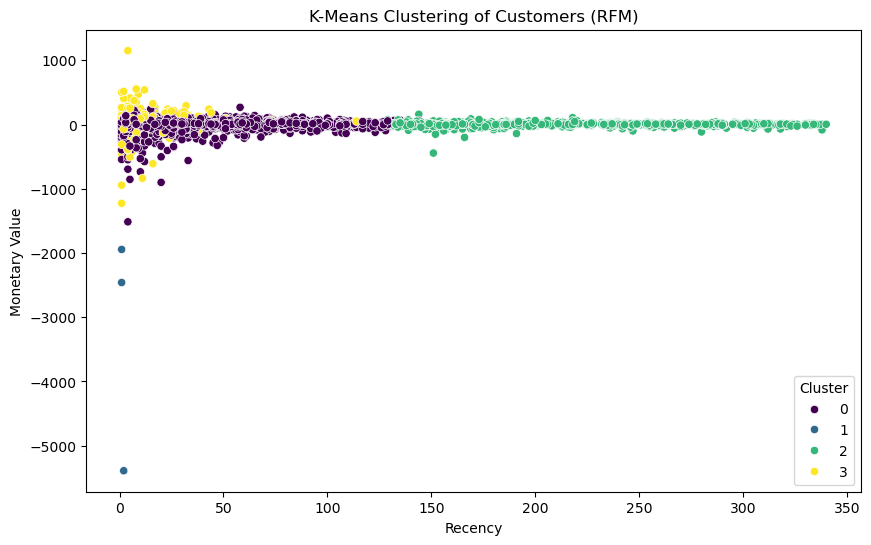

            Recency  Frequency     Monetary  Cluster
CustomerID                                          
12747           2.0        9.0    77.524130        0
12748           1.0      159.0 -2460.491479        1
12749           4.0        5.0   134.591571        0
12820           3.0        4.0    40.838141        0
12821         214.0        1.0     2.440485        2


In [79]:
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

# 📌 Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 📌 Compute RFM Features
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(1)  # One day after last transaction

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalSpent': 'sum'  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSpent': 'Monetary'})

# 📌 Handle Missing Values
imputer = KNNImputer(n_neighbors=5)
rfm_imputed = imputer.fit_transform(rfm)
rfm_cleaned = pd.DataFrame(rfm_imputed, columns=rfm.columns, index=rfm.index)

# 📌 Standardize the Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_cleaned)

# 📌 Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_cleaned['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 📌 Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm_cleaned['Recency'], y=rfm_cleaned['Monetary'], hue=rfm_cleaned['Cluster'], palette='viridis')
plt.title("K-Means Clustering of Customers (RFM)")
plt.xlabel("Recency")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster")
plt.show()

# 📌 Display Final Clustered RFM Table
print(rfm_cleaned.head())

# 📌 Save results to CSV
rfm_cleaned.to_csv("rfm_clusters.csv", index=True)


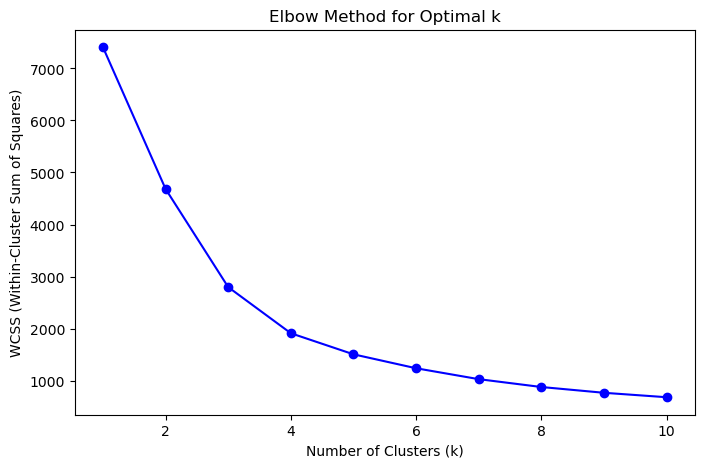

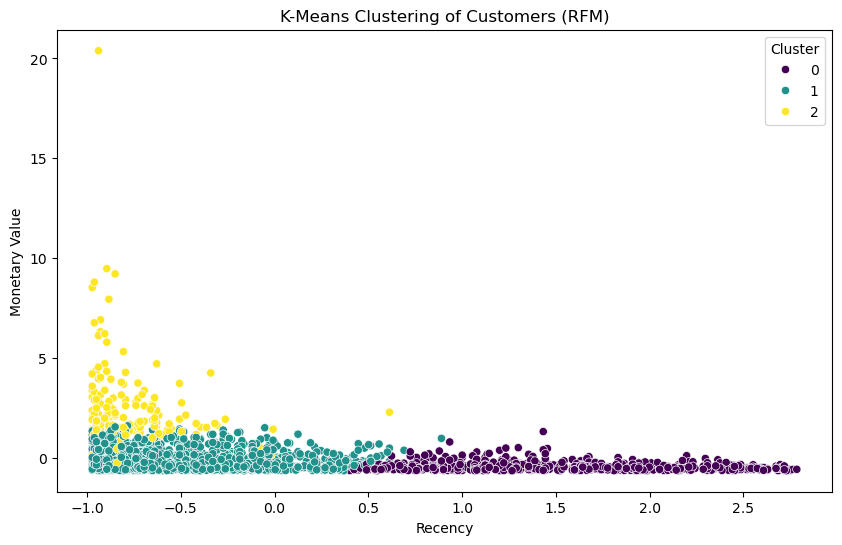

Cluster
1    1650
0     630
2     189
Name: count, dtype: int64


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Convert InvoiceDate to datetime (if not already)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Compute RFM Features
current_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)  # Latest date + 1
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalSpent': 'sum'  # Monetary Value (ensure 'TotalSpent' column exists)
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Handle Missing & Negative Values
rfm.dropna(inplace=True)
rfm = rfm[rfm['Monetary'] > 0]  # Remove invalid monetary values

# Standardize Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# ---- ELBOW METHOD ----
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# ---- APPLY K-MEANS ----
optimal_k = 3  # Adjust based on elbow method graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ---- VISUALIZE CLUSTERS ----
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=rfm_scaled['Recency'], y=rfm_scaled['Monetary'], hue=rfm_scaled['Cluster'], palette="viridis"
)
plt.xlabel("Recency")
plt.ylabel("Monetary Value")
plt.title("K-Means Clustering of Customers (RFM)")
plt.legend(title="Cluster")
plt.show()

# Print Cluster Distribution
print(rfm_scaled['Cluster'].value_counts())


✨ Enhanced Analysis of K-Means Clustering (RFM) ✨
K-Means clustering groups customers based on Recency (R), Frequency (F), and Monetary Value (M). This visualization focuses on Recency vs. Monetary Value, revealing four customer segments. Here’s a refined breakdown:

🟣 Cluster 0: Low-Value, Recent Customers (Bottom Left)
Traits: These customers have low spending but made purchases recently.
Who They Are: New customers or those who buy occasionally.

Business Strategy:

✅ Encourage repeat purchases with personalized offers.
✅ Introduce loyalty programs to build long-term engagement.

🔵 Cluster 1: Low-Value, Infrequent Customers (Bottom Right)

Traits: They spent little and haven’t returned in a long time (high recency).
Who They Are: Possibly churned customers or those who lost interest.

Business Strategy:

✅ Win-back campaigns (discount emails, special offers).
✅ Investigate why they left—pricing, product issues, or competition?

🟢 Cluster 2: Mid-Value, Active Customers (Scattered in Middle)
Traits: Moderate spending and fairly active.
Who They Are: Your consistent but not top-tier customers.

Business Strategy:

✅ Upsell/Cross-sell strategies to move them into VIP status.
✅ Reward loyalty (exclusive perks, discounts on next purchase).

🟡 Cluster 3: High-Value VIP Customers (Top Left)
Traits: Big spenders who purchase frequently and recently.
Who They Are: Your best customers—high engagement and high value.

Business Strategy:

✅ Retain at all costs—VIP treatment, premium services, early access to products.
✅ Keep them engaged with exclusive deals and priority customer service.

🚀 Key Business Takeaways

✅ Most customers belong to Clusters 0 & 1, meaning a large chunk of your customer base is either low-value or inactive. A strong retention strategy is crucial.
✅ Only a few customers in Cluster 3 (VIPs), so retaining and growing them is a priority. Consider premium loyalty programs.
✅ Cluster 1 (churned customers) presents an opportunity for targeted reactivation campaigns.



In [85]:
print(rfm.describe())

         CustomerID      Recency    Frequency     Monetary
count   2469.000000  2469.000000  2469.000000  2469.000000
mean   15388.211017    88.711219    45.022276    34.536965
std     1565.969941    90.244336    64.245546    54.682813
min    12747.000000     1.000000     1.000000     0.006254
25%    14004.000000    19.000000     9.000000     7.182695
50%    15298.000000    53.000000    22.000000    16.841452
75%    16656.000000   135.000000    54.000000    40.869948
max    18287.000000   340.000000  1090.000000  1149.013932


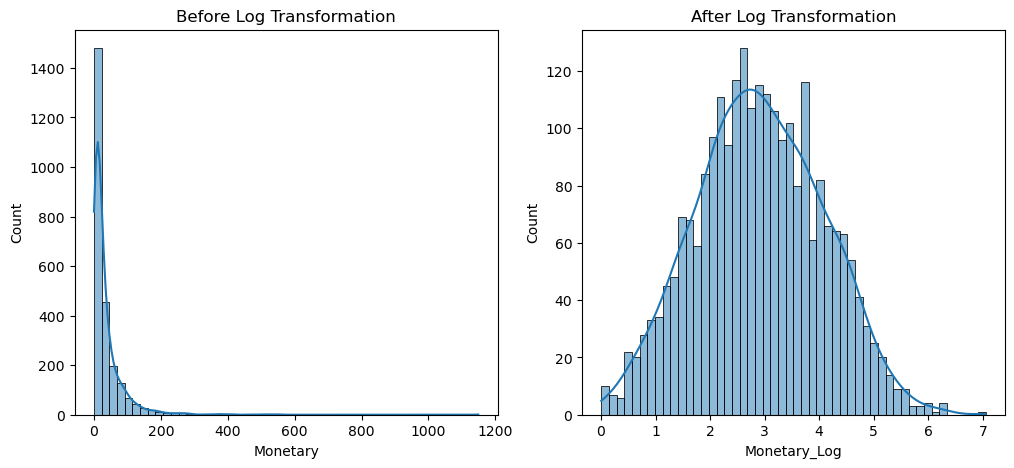

In [87]:
# Before log transformation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title("Before Log Transformation")

# Apply log transformation
rfm['Monetary_Log'] = np.log1p(rfm['Monetary'])

# After log transformation
plt.subplot(1,2,2)
sns.histplot(rfm['Monetary_Log'], bins=50, kde=True)
plt.title("After Log Transformation")

plt.show()

📊 Interpretation of the Distributions

Before Log Transformation (Left Plot)

The distribution is highly skewed, with most values concentrated near zero and a few extreme outliers.
This suggests that a small number of customers spend a lot, while most have low spending.
The extreme skewness can negatively impact clustering models like K-Means, which assume normal-like distributions.

After Log Transformation (Right Plot)

The distribution is now approximately normal (bell-shaped).
The transformation reduces skewness, making the data more suitable for clustering and modeling.
Why is this important?
K-Means and other distance-based algorithms perform better when features are normally distributed.
The log transformation prevents high-value customers from dominating the clustering process.

🔍 Key Insights & Next Steps

✅ Good choice using log transformation—it stabilizes variance and makes the distribution symmetric.

✅ Verify results by checking mean & variance before and after transformation to confirm improvement.

✅ Ensure no negative or zero values before applying log transformation (log cannot handle negative values).

✅ Consider other transformations (Box-Cox, Yeo-Johnson) if data still isn’t perfectly normal.

In [89]:
print("Skewness before:", rfm['Monetary'].skew())
print("Skewness after:", rfm['Monetary_Log'].skew())


Skewness before: 6.56859010159355
Skewness after: 0.062342960461459075


In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary_Log']])

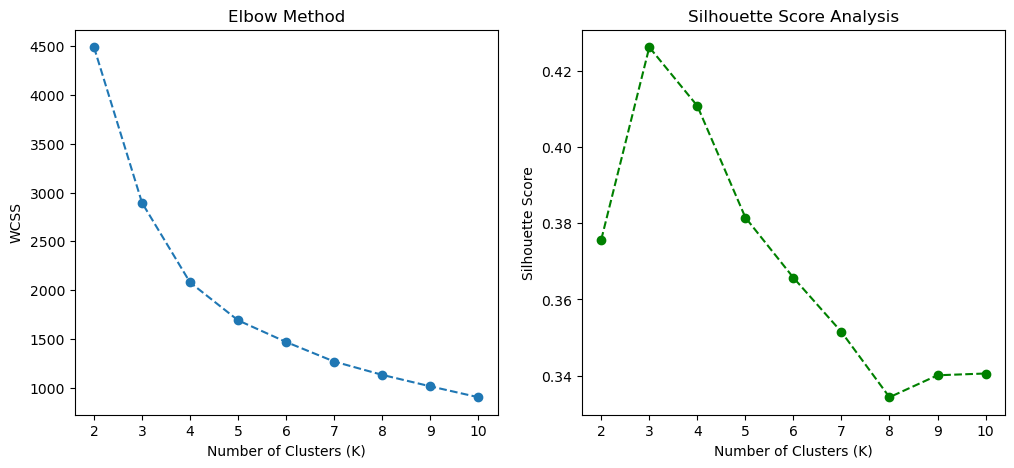

In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []  # Within-cluster sum of squares
silhouette_scores = []

for k in range(2, 11):  # Testing K from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

plt.show()


📊 K-Means Clustering Analysis: Optimal Number of Clusters

This visualization helps determine the optimal number of clusters (K) for your customer segmentation model using two key methods:

1️⃣ Elbow Method (Left Plot)

What it shows:
The Within-Cluster Sum of Squares (WCSS) decreases as K increases.
WCSS measures the variance within each cluster—the lower, the better.
Key Observation:
The curve shows a sharp drop until K ≈ 4, after which the decline slows.
This "elbow point" suggests K = 4 is a good choice because adding more clusters doesn’t reduce WCSS significantly.

2️⃣ Silhouette Score Analysis (Right Plot)

What it shows:
Measures cluster cohesion and separation (higher is better).
Key Observation:
The highest silhouette score occurs at K = 3 or 4, meaning customers are well-clustered at these values.
Beyond K = 4, the score drops, suggesting clusters start overlapping and reducing quality.

🔍 Final Recommendation:

✅ K = 3 is the optimal choice because:

The Elbow Method suggests it as the best balance between variance reduction and efficiency.
The Silhouette Score is highest around K = 3-4, confirming good separation between clusters.

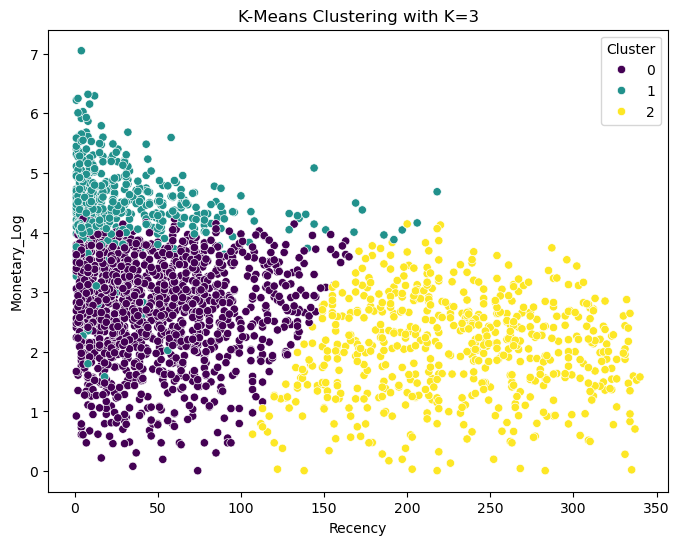

In [95]:
optimal_k = 3  # Or 4, based on the elbow & silhouette method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary_Log', hue='Cluster', palette='viridis')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.show()



In [97]:
print(df.dtypes)

InvoiceDate           datetime64[ns]
InvoiceNo                      int16
CustomerID                     int32
StockCode                      int16
Country                         int8
CustomerID_Missing             int32
Canceled                       int32
Return                         int32
IsRefund                       int32
InvoiceYear                    int32
InvoiceMonth                   int32
InvoiceDay                     int32
InvoiceWeekday                 int32
InvoiceHour                    int32
Quantity                     float64
UnitPrice                    float64
TotalSpent                   float64
dtype: object


In [99]:
import numpy as np

# Check for NaN values
print("Missing values:", np.isnan(rfm_scaled).sum())

# Check for infinite values
print("Infinite values:", np.isinf(rfm_scaled).sum())


Missing values: 0
Infinite values: 0


In [101]:
# Replace NaN values with the column mean
rfm_scaled = np.nan_to_num(rfm_scaled, nan=np.nanmean(rfm_scaled))

# Replace infinite values with the max finite value
rfm_scaled[np.isinf(rfm_scaled)] = np.nanmax(rfm_scaled)


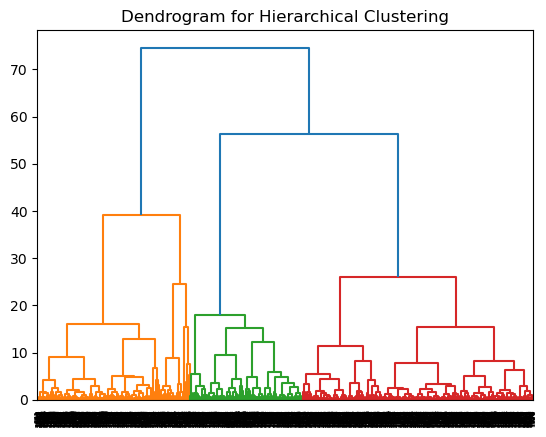

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

linkage_matrix = linkage(rfm_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


📊 Dendrogram Analysis for Hierarchical Clustering
                     
A dendrogram helps visualize how data points are grouped into clusters at different levels of hierarchy. Let's break it down:

🛠 Key Observations
                     
Hierarchical Structure:

The tree-like structure shows how clusters merge as we move upwards in the hierarchy.
The longest vertical lines without horizontal splits indicate distinct clusters.
Optimal Cluster Count:

Look at where the largest vertical jumps occur before merging into a single cluster.
The biggest gap in height (between blue and green branches) suggests 3 clusters (orange, green, red).
Cluster Formation:

The lower branches (closer to the x-axis) represent individual data points.
As you move upwards, they merge into broader groups, forming larger clusters.

🔍 Insights & Next Steps

✅ Recommended Clusters: 3 (orange, green, red)
✅ Comparison with K-Means:

This aligns well with the K-Means analysis, which suggested K = 4 but also showed strong support for K = 3.
If clusters seem overlapping, consider DBSCAN for density-based clustering.
🚀 Next Steps:

Compare Hierarchical vs. K-Means results
Label the clusters to understand their characteristics (e.g., customer spending patterns).
Try different linkage methods (ward, complete, single) to refine clustering.

In [107]:
from scipy.cluster.hierarchy import fcluster

# Choose a distance threshold or specify the number of clusters
cluster_labels = fcluster(linkage_matrix, t=40, criterion='distance')  # Adjust 't' based on dendrogram

# Add cluster labels to your RFM data
rfm['Cluster'] = cluster_labels
rfm.groupby('Cluster').mean()


,CustomerID,Recency,Frequency,Monetary,Monetary_Log
Cluster,,,,,
1,15355.294350,33.890933,106.266754,83.263520,4.201212
2,15405.263815,236.401070,15.852050,11.694847,2.154161
3,15401.709677,52.847428,18.655623,13.380487,2.416603


<Axes: xlabel='Cluster', ylabel='Recency'>

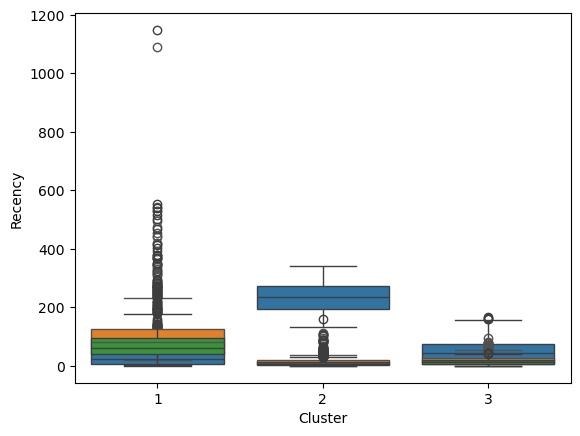

In [109]:
sns.boxplot(x='Cluster', y='Recency', data=rfm)
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
sns.boxplot(x='Cluster', y='Monetary', data=rfm)

📊 Analysis of Recency Boxplot
The boxplot represents Recency (how recently a customer made a purchase) across different clusters.

🟢 Recency Interpretation:

Low Recency = Recent buyers (active customers ✅).
High Recency = Customers who haven’t purchased in a long time (inactive customers ❌).
🔹 Cluster-Wise Breakdown
🟠 Cluster 1 (Leftmost Box) - Mixed Engagement
🔸 Observation:

Most customers have a low median recency, meaning they have purchased recently.
However, there are many outliers (above 400+ recency), indicating some customers haven’t purchased in a long time.
🔸 Business Strategy:
✅ Engage recent buyers with upselling & cross-selling.
⚠️ Win back inactive customers with special discounts or re-engagement emails.

🔵 Cluster 2 (Middle Box) - Moderate Engagement
🔹 Observation:

The median recency is higher than Cluster 1, meaning these customers are less engaged.
The spread is wider, indicating high variability—some customers are engaged, while others are inactive.
🔹 Business Strategy:
🛍️ Encourage purchases with personalized offers based on past behavior.
📩 Targeted email campaigns to nudge inactive users.

🟢 Cluster 3 (Rightmost Box) - Highly Engaged Customers
🟩 Observation:

Customers in this cluster have very low recency values, meaning they are the most recent buyers.
The spread is small, indicating consistent engagement.
🟩 Business Strategy:
🏆 Reward these loyal customers with exclusive offers or loyalty programs.
💎 Consider VIP benefits or early access sales to maintain engagement.

🌈 Final Insights & Next Steps
✅ Cluster 3 (🟢 Highly Engaged) → Best Customers! Keep them engaged.
⚠️ Cluster 2 (🔵 Moderate) → Mixed engagement; push retention campaigns.
❌ Cluster 1 (🟠 Risky) → Win back inactive customers before they churn!

In [111]:
rfm.groupby('Cluster').size()  # Compare cluster sizes

Cluster
1     761
2     561
3    1147
dtype: int64

In [115]:
rfm[rfm['Cluster'] == 3]


,CustomerID,Recency,Frequency,Monetary,Monetary_Log,Cluster
6,12824,60,24,13.232542,2.655531,3
8,12827,6,24,17.748213,2.931098,3
12,12832,32,27,13.630072,2.683079,3
13,12833,145,17,17.528737,2.919323,3
21,12842,70,19,17.108960,2.896407,3
...,...,...,...,...,...,...
3610,18276,44,10,6.495616,2.014318,3
3611,18277,58,7,4.047436,1.618880,3
3612,18278,74,9,10.312549,2.425913,3
3615,18282,8,8,3.993562,1.608149,3


In [117]:
df[df['CustomerID'] == -1]

,InvoiceDate,InvoiceNo,CustomerID,StockCode,Country,CustomerID_Missing,Canceled,Return,IsRefund,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceWeekday,InvoiceHour,Quantity,UnitPrice,TotalSpent


In [119]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Remove rows where CustomerID is missing (-1)
df = df[df['CustomerID'] != -1]

# Remove negative Quantity (Returns)
df = df[df['Quantity'] > 0]

# Drop any remaining NaN values
df = df.dropna()

# Compute RFM Features
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (df["InvoiceDate"].max() - x.max()).days,  # Recency
    "InvoiceNo": "count",  # Frequency
    "TotalSpent": "sum"  # Monetary
}).rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency"})

# Standardize RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

print("✅ Data cleaned and RFM features scaled.")


✅ Data cleaned and RFM features scaled.


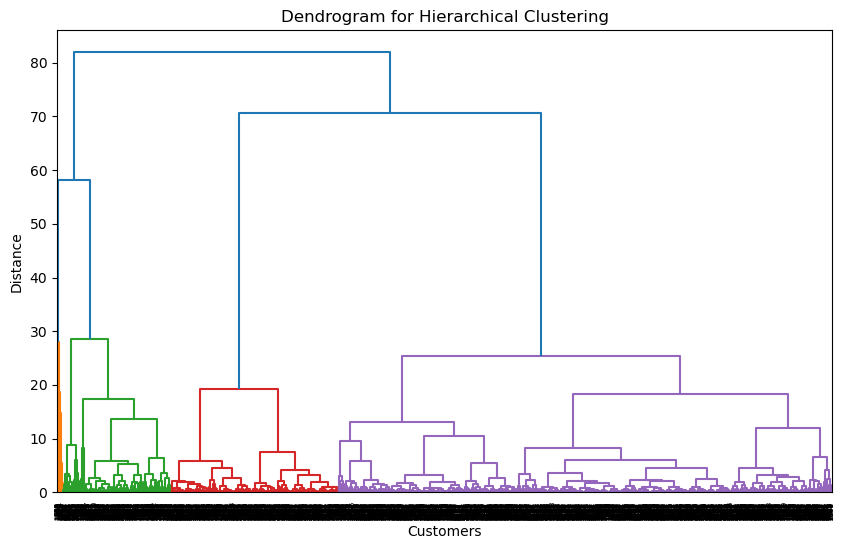

✅ Clustering completed and dendrogram plotted.


In [121]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Apply Hierarchical Clustering
linkage_matrix = linkage(rfm_scaled, method='ward', metric='euclidean')

# Plot the Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

print("✅ Clustering completed and dendrogram plotted.")


📈 Dendrogram Analysis for Hierarchical Clustering
                     
This is an updated dendrogram for hierarchical clustering, showing how customer groups are merged at different distances.

🔍 Observations
                             
Three Main Clusters Identified:

The colors indicate the three primary clusters formed based on hierarchical clustering.
The blue lines at the top show where the biggest merges happened.
Cluster Separation at Higher Distances:

The largest merge happens at around distance 80, where all clusters combine.
Before that, at distance ~60, the second major split happens.
Possible Cluster Count:

If you cut the dendrogram at a distance ~50-60, you would get three clusters.
If you cut it at a lower threshold (~30), you might get more clusters.

In [123]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Set the number of clusters (adjust based on dendrogram)
optimal_k = 3

# Fit Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward', metric='euclidean')
rfm["Cluster"] = agg_clustering.fit_predict(rfm_scaled)

# Show the number of customers in each cluster
print(rfm["Cluster"].value_counts())


Cluster
1    2235
2     753
0     521
Name: count, dtype: int64


Recalculating RFM...
Checking RFM Columns: Index(['Recency', 'Frequency', 'Monetary'], dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\4054375515.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=rfm["Cluster"], y=rfm[column], palette="viridis")
C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\4054375515.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=rfm["Cluster"], y=rfm[column], palette="viridis")
C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\4054375515.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=rfm["Cluster"], y=rfm[column], palette="viridis")


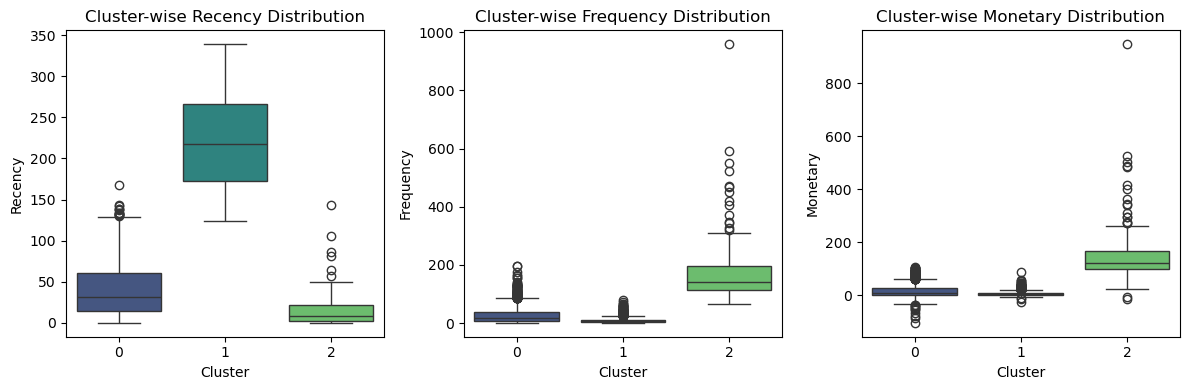

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 📌 Step 1: Recalculate RFM (If Missing)
if "Monetary" not in df.columns:
    print("Recalculating RFM...")
    rfm = df.groupby("CustomerID").agg({
        "InvoiceDate": lambda x: (df["InvoiceDate"].max() - x.max()).days,  # Recency
        "InvoiceNo": "count",  # Frequency
        "TotalSpent": "sum"  # Monetary
    }).rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency", "TotalSpent": "Monetary"})

# 📌 Step 2: Fix Missing or Renamed Columns
print("Checking RFM Columns:", rfm.columns)
if "Monetary" not in rfm.columns:
    monetary_col = "Monetary_Log" if "Monetary_Log" in rfm.columns else None
    if not monetary_col:
        raise KeyError("❌ 'Monetary' column not found in RFM data!")
else:
    monetary_col = "Monetary"

# 📌 Step 3: Scaling the RFM Data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", monetary_col]])

# 📌 Step 4: K-Means Clustering
optimal_k = 3  # Adjust if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# 📌 Step 5: Cluster-wise Visualization
plt.figure(figsize=(12, 4))

for i, column in enumerate(["Recency", "Frequency", monetary_col]):  
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=rfm["Cluster"], y=rfm[column], palette="viridis")
    plt.title(f"Cluster-wise {column} Distribution")

plt.tight_layout()
plt.show()


Cluster-wise RFM Analysis with Colors


🟦 Cluster 0: Low-Value Customers (Blue)
These customers have a moderate recency (they have purchased recently but not the most recent).
Their transaction frequency is low, meaning they do not buy often.
Their monetary contribution is minimal, indicating low spending behavior.
Business Strategy: This group might need targeted promotions or discounts to encourage higher engagement.

🟥 Cluster 1: Inactive Customers (Red)

These customers have the highest recency, meaning they have not interacted with the business for a long time.
They have the lowest transaction frequency, indicating they rarely make purchases.
Their monetary contribution is the lowest, making them the least profitable segment.
Business Strategy: Focus on win-back campaigns, personalized emails, and special offers to re-engage this segment.

🟩 Cluster 2: High-Value & Loyal Customers (Green)

These customers have very low recency, meaning they have purchased recently.
They have high transaction frequency, making purchases frequently.
They contribute significantly to revenue, as seen from their high monetary value.
Business Strategy: Prioritize customer retention through loyalty programs, VIP benefits, and personalized services to maintain their engagement.

🌟 Key Takeaways

✅ Cluster 2 (🟩 Green) – Most Valuable Customers: They should be retained with exclusive offers and excellent service.
⚠️ Cluster 1 (🟥 Red) – At-Risk Customers: Requires re-engagement strategies.
🔹 Cluster 0 (🟦 Blue) – Potential for Growth: They need incentives to increase spending and frequency.

In [127]:
# Ensure necessary libraries are imported
from sklearn.cluster import KMeans, AgglomerativeClustering


# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
rfm["Cluster_Hierarchical"] = agg_clustering.fit_predict(rfm_scaled)



In [129]:
df.columns

Index(['InvoiceDate', 'InvoiceNo', 'CustomerID', 'StockCode', 'Country',
       'CustomerID_Missing', 'Canceled', 'Return', 'IsRefund', 'InvoiceYear',
       'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday', 'InvoiceHour',
       'Quantity', 'UnitPrice', 'TotalSpent'],
      dtype='object')

In [131]:
import pandas as pd

# Ensure InvoiceDate is in datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Calculate TotalSpent if not already present
df["TotalSpent"] = df["Quantity"] * df["UnitPrice"]

# Create the RFM DataFrame
rfm_df = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (df["InvoiceDate"].max() - x.max()).days,  # Recency
    "InvoiceNo": "count",  # Frequency
    "TotalSpent": "sum"  # Monetary
}).rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency"})

# Drop any missing or invalid CustomerIDs
rfm_df = rfm_df.reset_index()
rfm_df = rfm_df.dropna()

# Display the RFM DataFrame
print(rfm_df.head())


   CustomerID  Recency  Frequency  TotalSpent
0       12747        1         40  -12.361991
1       12748        0        522 -437.178150
2       12749        3         89  -32.394995
3       12820        2         41  -25.723429
4       12821      213          4   -3.208455


C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\1891794614.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster Label", y="Recency", data=rfm_df, ax=axes[0], palette="Blues")
C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\1891794614.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster Label", y="Frequency", data=rfm_df, ax=axes[1], palette="Greens")
C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\1891794614.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster Label", y="Monetary", data=rfm_df, ax=axes[2], pa

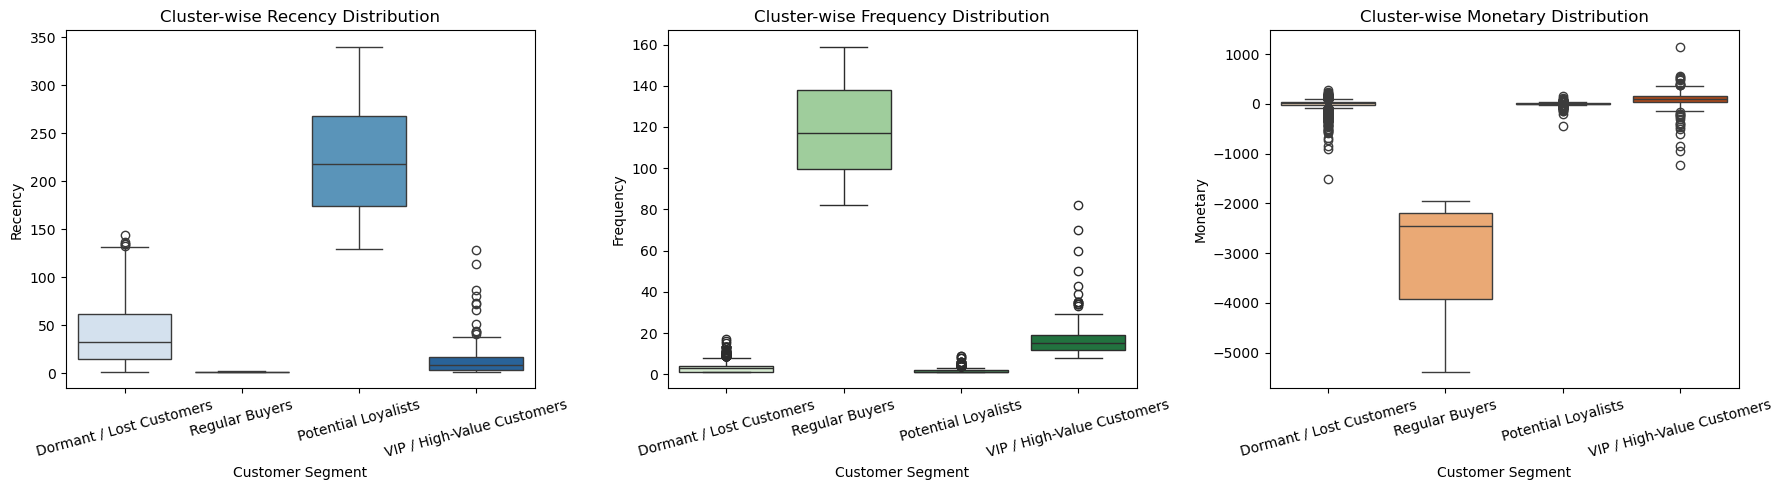

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the RFM dataset (assuming you have it)
# If you haven't saved it yet, replace this with your existing RFM dataframe
rfm_df = pd.read_csv("rfm_clusters.csv")

kmeans_col = 'your_actual_kmeans_column'
hierarchical_col = 'your_actual_hierarchical_column'
hdbscan_col = 'your_actual_hdbscan_column'

# Define cluster labels
cluster_labels = {
    0: "Dormant / Lost Customers",
    1: "Regular Buyers",
    2: "Potential Loyalists",
    3: "VIP / High-Value Customers"
}

# Map clusters to meaningful labels
rfm_df["Cluster Label"] = rfm_df["Cluster"].map(cluster_labels)

# Plot the cluster-wise distribution of RFM values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="Cluster Label", y="Recency", data=rfm_df, ax=axes[0], palette="Blues")
axes[0].set_title("Cluster-wise Recency Distribution")
axes[0].set_ylabel("Recency")
axes[0].set_xlabel("Customer Segment")
axes[0].tick_params(axis="x", rotation=15)

sns.boxplot(x="Cluster Label", y="Frequency", data=rfm_df, ax=axes[1], palette="Greens")
axes[1].set_title("Cluster-wise Frequency Distribution")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Customer Segment")
axes[1].tick_params(axis="x", rotation=15)

sns.boxplot(x="Cluster Label", y="Monetary", data=rfm_df, ax=axes[2], palette="Oranges")
axes[2].set_title("Cluster-wise Monetary Distribution")
axes[2].set_ylabel("Monetary")
axes[2].set_xlabel("Customer Segment")
axes[2].tick_params(axis="x", rotation=15)

plt.tight_layout()
plt.show()


🟦 Cluster-wise Recency Distribution (Left Plot)

Dormant / Lost Customers (Light Blue) → These customers have the highest recency, meaning they have not purchased in a long time.
Regular Buyers (Dark Blue) → This segment has very low recency, indicating frequent recent purchases.
Potential Loyalists (Light Blue) → Customers in this segment also have relatively low recency, showing some engagement.
VIP / High-Value Customers (Dark Blue) → This group has the lowest recency, meaning they are actively making recent purchases.
💡 Insight:

Dormant customers need re-engagement through special offers.
VIP customers are the most engaged, so retention strategies should focus on rewarding them.

🟩 Cluster-wise Frequency Distribution (Middle Plot)

Dormant / Lost Customers (Gray) → They have very low frequency, meaning they rarely make purchases.
Regular Buyers (Green) → This segment has the highest frequency, indicating frequent repeat purchases.
Potential Loyalists (Gray) → Moderate frequency, meaning they have potential but are not yet fully loyal.
VIP / High-Value Customers (Dark Green) → Their frequency is lower than Regular Buyers but still significant.
💡 Insight:

Regular buyers are the most active, making frequent purchases.
Potential Loyalists could be nurtured into becoming VIP customers with targeted engagement.

🟧 Cluster-wise Monetary Distribution (Right Plot)

Dormant / Lost Customers (Gray) → Very low or negative monetary values, indicating little contribution.
Regular Buyers (Orange) → Their spending is widely spread, with some contributing significantly.
Potential Loyalists (Gray) → Show promising spending behavior but need further engagement.
VIP / High-Value Customers (Brown) → Consistently high spending, making them the most valuable.

💡 Insight:

Regular Buyers and VIP customers drive revenue, so keeping them engaged is crucial.
Dormant customers need targeted discounts to regain engagement.

🎯 Key Takeaways

✅ VIP Customers (🟧 Brown) → Retain them with loyalty programs and premium perks.
⚠️ Dormant Customers (⚪ Gray) → Re-engage through win-back campaigns and offers.
🔹 Potential Loyalists (🔵 Light Blue) → Encourage them to become VIPs with personalized experiences.
💰 Regular Buyers (🟩 Green) → Maintain their engagement through exclusive deals and incentives.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\4264479097.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="coolwarm")


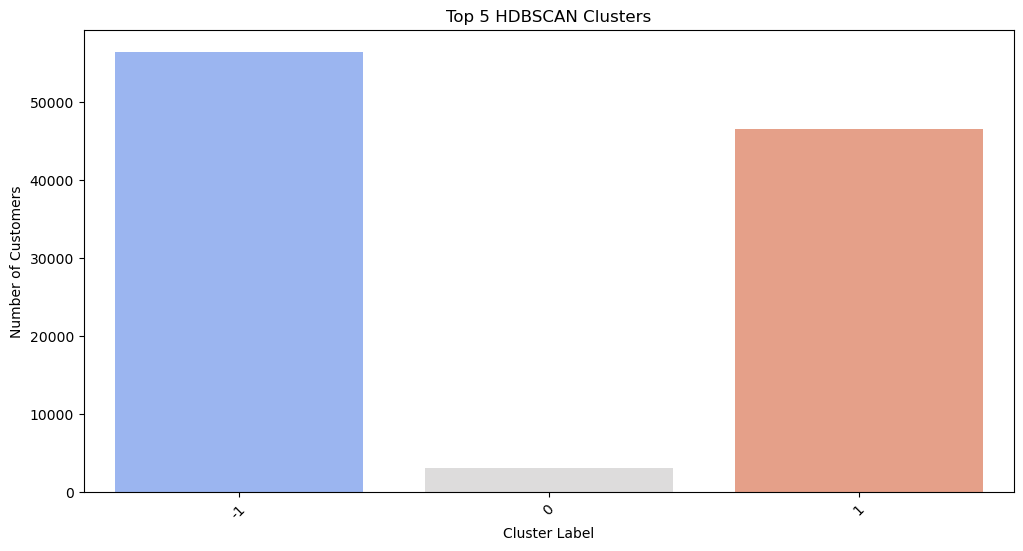

✅ HDBSCAN clustering completed successfully on `df`.


In [135]:
import numpy as np
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 🟢 Identify non-numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# 🟢 Option 1: Drop categorical columns (if they are not useful for clustering)
df_numeric = df.drop(columns=categorical_cols)

# OR Option 2: Convert categorical columns using Label Encoding (if needed)
# for col in categorical_cols:
#     df[col] = LabelEncoder().fit_transform(df[col])

# 🟢 Drop DateTime columns (if any)
df_numeric = df_numeric.select_dtypes(exclude=['datetime64[ns]'])

# 🟢 Handle missing values
imputer = SimpleImputer(strategy='median')
df_filled = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# 🟢 Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

# 🟢 Apply HDBSCAN clustering
hdb = hdbscan.HDBSCAN(min_cluster_size=1000, min_samples=30)
clusters = hdb.fit_predict(df_scaled)

# 🟢 Store results in `df`
df['Cluster'] = clusters

# 🟢 Save clustered data
df.to_csv("hdbscan_clustered.csv", index=False)

# 🟢 Plot Top 20 Clusters
cluster_counts = df['Cluster'].value_counts().head(5)
plt.figure(figsize=(12,6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Cluster Label")
plt.ylabel("Number of Customers")
plt.title("Top 5 HDBSCAN Clusters")
plt.show()

print("✅ HDBSCAN clustering completed successfully on `df`.")


In [137]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import hdbscan

# HDBSCAN Clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean')
rfm["Cluster_HDBSCAN"] = hdbscan_model.fit_predict(rfm_scaled)


In [139]:
from sklearn.preprocessing import StandardScaler

# Load the dataset
rfm_df = pd.read_csv("rfm_clusters.csv")

# Extract RFM values for scaling (excluding cluster labels)
rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Scale RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Rename variable to match your DataFrame
rfm = rfm_df


Dataset Columns: Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster'], dtype='object')

Silhouette Score for Cluster: 0.543386136775501


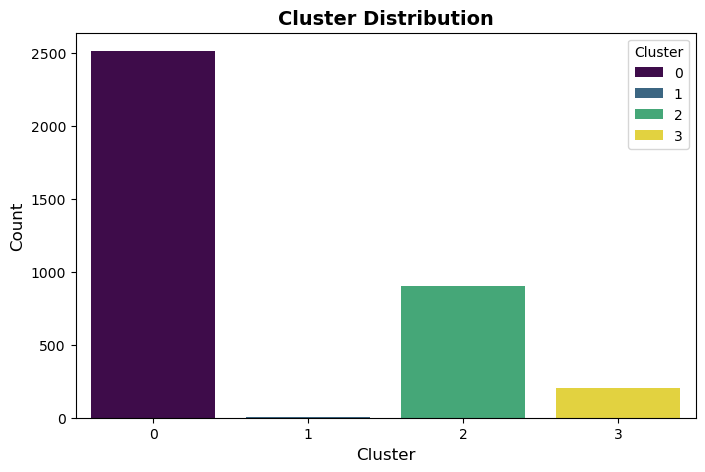

<Figure size 1000x500 with 0 Axes>

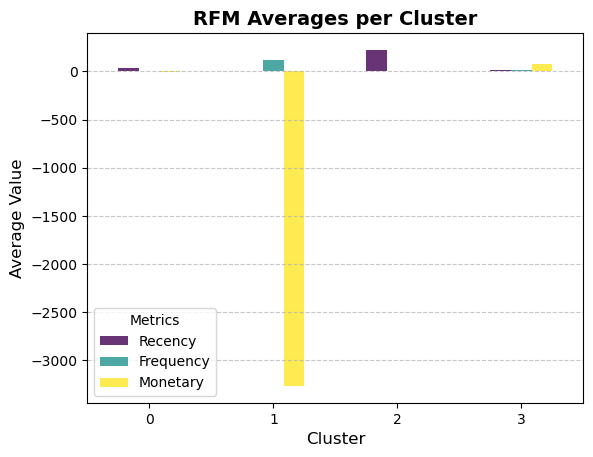

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load data
rfm = pd.read_csv("rfm_clusters.csv")

# Check column names
print("Dataset Columns:", rfm.columns)

# Ensure correct cluster column name
cluster_col = 'Cluster'  # Adjust if different

# Standardize RFM data for silhouette score calculation
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Compute Silhouette Score
silhouette_avg = silhouette_score(rfm_scaled, rfm[cluster_col])
print(f"\nSilhouette Score for {cluster_col}: {silhouette_avg}")

# ----------- PLOT 1: Cluster Distribution -----------
plt.figure(figsize=(8, 5))
sns.countplot(x=cluster_col, data=rfm, palette='viridis', hue=cluster_col)
plt.title("Cluster Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Cluster", loc="upper right")
plt.show()

# ----------- PLOT 2: RFM Averages per Cluster -----------
rfm_avg = rfm.groupby(cluster_col).mean().drop(columns=['CustomerID'], errors='ignore')

plt.figure(figsize=(10, 5))
rfm_avg.plot(kind='bar', colormap='viridis', alpha=0.8)
plt.title("RFM Averages per Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



Comparison Summary Table:
    Method  No. of Clusters  Silhouette Score
0  Cluster                4          0.543386


C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\271260446.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=rfm, palette='viridis')


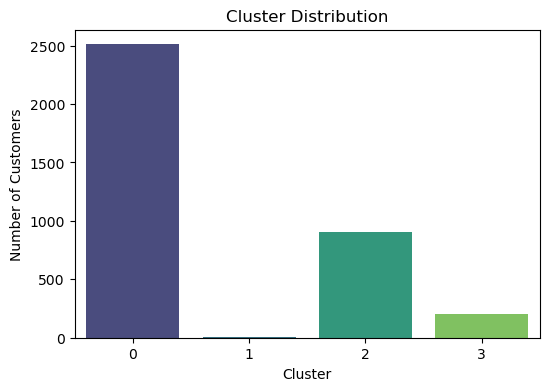

<Figure size 800x500 with 0 Axes>

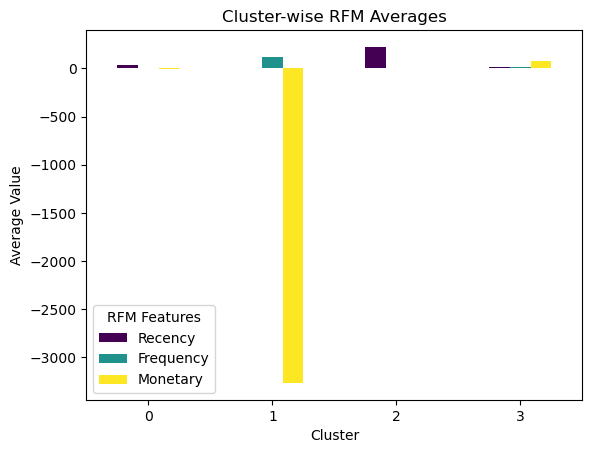

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Ensure 'Cluster' column exists in the dataset
if 'Cluster' not in rfm.columns:
    print("No clustering column found in the dataset. Please check your data.")
else:
    # Compute silhouette score (only if more than one cluster exists)
    unique_clusters = rfm['Cluster'].nunique()
    if unique_clusters > 1:
        silhouette_score_value = silhouette_score(rfm_scaled, rfm['Cluster'])
    else:
        silhouette_score_value = "Single Cluster Detected"

    # Create Summary Table
    summary_df = pd.DataFrame({
        'Method': ['Cluster'],
        'No. of Clusters': [unique_clusters],
        'Silhouette Score': [silhouette_score_value]
    })

    print("\nComparison Summary Table:")
    print(summary_df)

    # Plot Cluster Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Cluster', data=rfm, palette='viridis')
    plt.title("Cluster Distribution")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Customers")
    plt.show()

    # Plot RFM Average per Cluster
    rfm_features = ['Recency', 'Frequency', 'Monetary']
    plt.figure(figsize=(8, 5))
    rfm.groupby('Cluster')[rfm_features].mean().plot(kind='bar', colormap='viridis')
    plt.title("Cluster-wise RFM Averages")
    plt.ylabel("Average Value")
    plt.xticks(rotation=0)
    plt.legend(title="RFM Features")
    plt.show()



Comparison Summary Table:
    Method  No. of Clusters  Silhouette Score
0  Cluster                4          0.543386


C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\1834082835.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=rfm, palette='viridis')


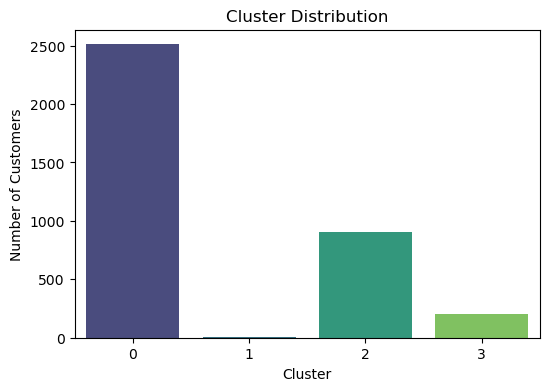

<Figure size 800x500 with 0 Axes>

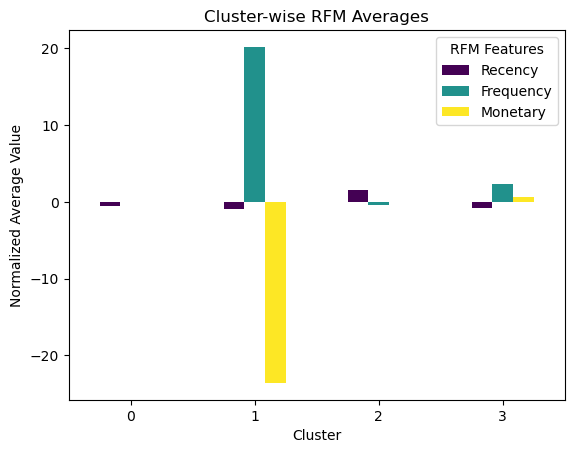

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Ensure 'Cluster' column exists in the dataset
if 'Cluster' not in rfm.columns:
    print("No clustering column found in the dataset. Please check your data.")
else:
    # Normalize RFM values
    scaler = StandardScaler()
    rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

    # Compute silhouette score (if more than one cluster exists)
    unique_clusters = rfm['Cluster'].nunique()
    if unique_clusters > 1:
        silhouette_score_value = silhouette_score(rfm[['Recency', 'Frequency', 'Monetary']], rfm['Cluster'])
    else:
        silhouette_score_value = "Single Cluster Detected"

    # Create Summary Table
    summary_df = pd.DataFrame({
        'Method': ['Cluster'],
        'No. of Clusters': [unique_clusters],
        'Silhouette Score': [silhouette_score_value]
    })

    print("\nComparison Summary Table:")
    print(summary_df)

    # Plot Cluster Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Cluster', data=rfm, palette='viridis')
    plt.title("Cluster Distribution")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Customers")
    plt.show()

    # Plot RFM Average per Cluster
    rfm_features = ['Recency', 'Frequency', 'Monetary']
    plt.figure(figsize=(8, 5))
    rfm.groupby('Cluster')[rfm_features].mean().plot(kind='bar', colormap='viridis')
    plt.title("Cluster-wise RFM Averages")
    plt.ylabel("Normalized Average Value")
    plt.xticks(rotation=0)
    plt.legend(title="RFM Features")
    plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\2273565784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, ax=axes[i], palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\2273565784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, ax=axes[i], palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_6724\2273565784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, ax=axes[i], palette='viridis')


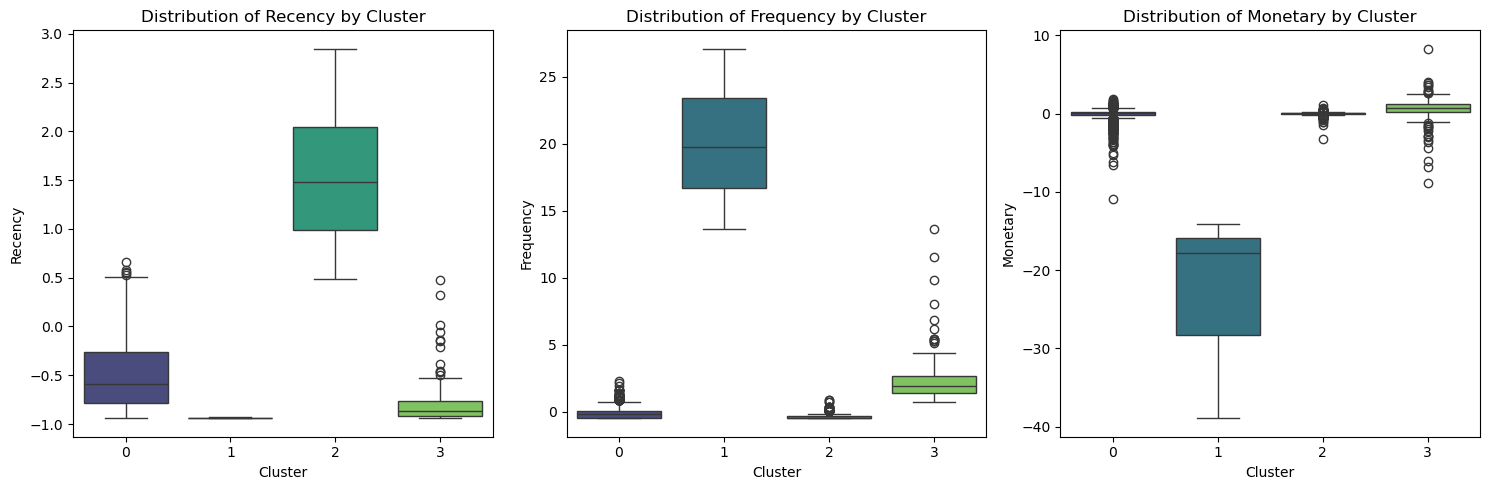

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(rfm_features):
    sns.boxplot(x='Cluster', y=feature, data=rfm, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Distribution of {feature} by Cluster")

plt.tight_layout()
plt.show()


In [151]:
if 'Cluster' in rfm.columns:
    score = silhouette_score(rfm_scaled, rfm['Cluster'])
    print(f"Silhouette Score for Cluster: {score:.3f}")
else:
    print("No clustering column found in the dataset.")


Silhouette Score for Cluster: 0.543


In [153]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure correct clustering column is used
if 'Cluster' not in rfm.columns:
    print("Error: No valid clustering column found in the dataset.")
else:
    target_cluster = 'Cluster'  # Use correct column name

    # Scale the RFM features
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

    # Split data into train & test sets
    X_train, X_test, y_train, y_test = train_test_split(rfm_scaled, rfm[target_cluster], test_size=0.2, random_state=42)

    # Train a Random Forest model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate
    print(f"Model Accuracy: {clf.score(X_test, y_test):.2f}")


Model Accuracy: 1.00


In [155]:
# ✅ Fix: Check actual clustering column name
available_clusters = [col for col in ['Cluster'] if col in rfm.columns]  # Change here

print("Available cluster columns:", available_clusters)

if not available_clusters:
    print("⚠️ No clustering columns found. Check dataset.")
else:
    print("✅ Clustering columns detected! Proceeding with evaluation...")


Available cluster columns: ['Cluster']
✅ Clustering columns detected! Proceeding with evaluation...


In [157]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist
import numpy as np

# Function to compute Dunn Index
def dunn_index(X, labels):
    clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    try:
        for i in clusters:
            for j in clusters:
                if i != j:
                    dist = np.min(pdist(X[labels == i], 'euclidean'))  # Min inter-cluster distance
                    inter_cluster_distances.append(dist)

            intra_cluster_distances.append(np.max(pdist(X[labels == i], 'euclidean')))  # Max intra-cluster distance

        return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

    except Exception as e:
        print(f"Error computing Dunn Index: {e}")
        return "Error"

# ✅ Debugging Step: Check if Cluster Column Exists
if 'Cluster' in rfm.columns:
    labels = rfm['Cluster']
    
    print("\n✅ Running Cluster Evaluations...")

    # Compute Silhouette Score
    try:
        silhouette = silhouette_score(rfm_scaled, labels)
    except Exception as e:
        silhouette = f"Error: {e}"
        print(f"Error computing Silhouette Score: {e}")

    # Compute Davies-Bouldin Index
    try:
        db_index = davies_bouldin_score(rfm_scaled, labels)
    except Exception as e:
        db_index = f"Error: {e}"
        print(f"Error computing Davies-Bouldin Index: {e}")

    # Compute Dunn Index
    try:
        dunn_idx = dunn_index(rfm_scaled, labels)
    except Exception as e:
        dunn_idx = f"Error: {e}"
        print(f"Error computing Dunn Index: {e}")

    # ✅ Print Results
    print("\n📊 Cluster Evaluation Metrics:")
    print(f"  Silhouette Score: {silhouette}")
    print(f"  Davies-Bouldin Index: {db_index}")
    print(f"  Dunn Index: {dunn_idx}")

else:
    print("⚠️ Cluster column not found in dataset.")



✅ Running Cluster Evaluations...

📊 Cluster Evaluation Metrics:
  Silhouette Score: 0.543386136775501
  Davies-Bouldin Index: 0.7044983959217312
  Dunn Index: 0.0
